In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# set matplotlib settings for a high quality output
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'Hack Nerd Font'
plt.rcParams['figure.dpi'] = 300


In [69]:
df = pd.read_csv('./Data/succint2022.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,ride_duration,start_station_id,end_station_id,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,177.0,525,RP-007,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,261.0,525,RP-007,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,261.0,TA1306000016,TA1307000001,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,896.0,KA1504000151,TA1309000021,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,362.0,TA1309000002,TA1305000029,member


In [70]:
# create a column start_date to extracts the date from the started_at column
df['start_date'] = pd.to_datetime(df['started_at']).dt.date
df['end_date'] = pd.to_datetime(df['ended_at']).dt.date
# df.head()

In [71]:
df_member = df[df['member_casual'] == 'member']
df_casual = df[df['member_casual'] == 'casual']

## Preferences of bike types

In [72]:
# group by rideable_type and count the number of distinct dates appeared for rideable_type
df.groupby(['member_casual', 'rideable_type']).agg({'start_date': [min, max, pd.Series.nunique]})

start_date                    
                                    min         max nunique
member_casual rideable_type                                
casual        classic_bike   2022-01-01  2022-12-31     365
              docked_bike    2022-01-01  2022-12-31     365
              electric_bike  2022-01-01  2022-12-31     364
member        classic_bike   2022-01-01  2022-12-31     365
              electric_bike  2022-01-01  2022-12-31     364

rideable_type  classic_bike  docked_bike  electric_bike
member_casual                                          
casual             875955.0     173236.0       681332.0
member            1682804.0          NaN       877966.0


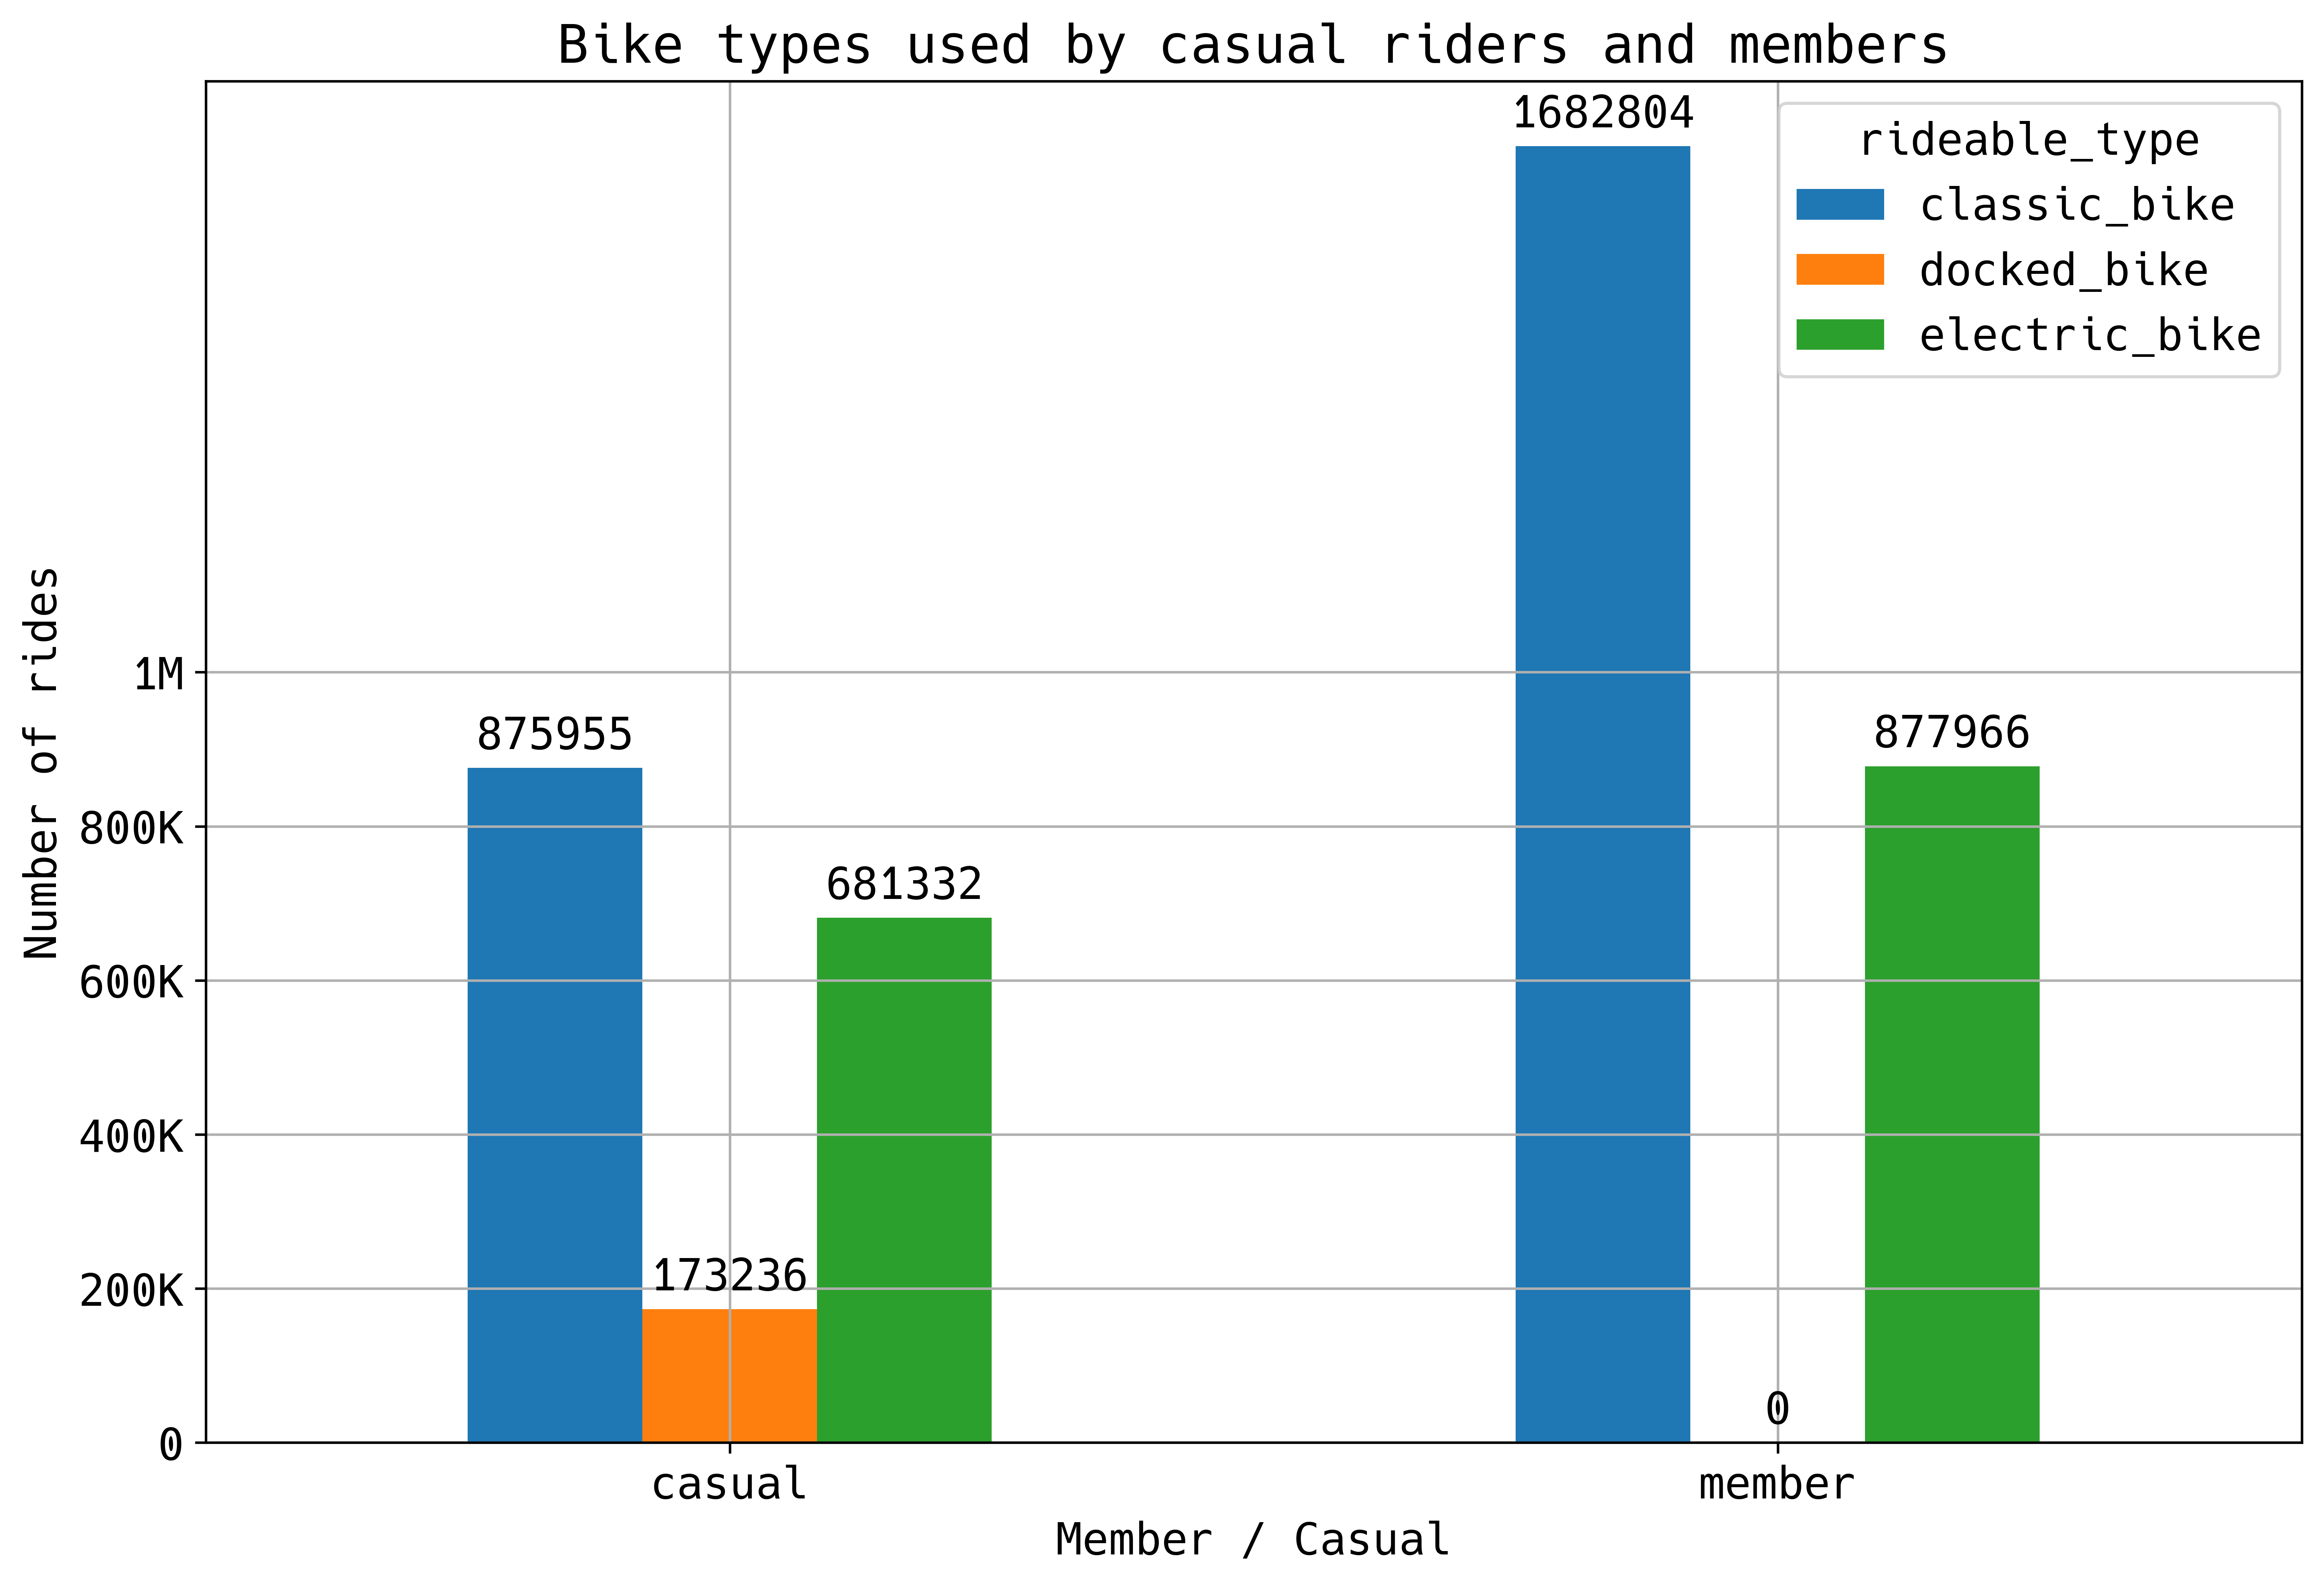

In [73]:
print(df.groupby(['member_casual', 'rideable_type']).size().unstack())
# create a relationship between member_casual and rideable_type
df.groupby(['member_casual', 'rideable_type']).size().unstack().plot(kind = 'bar')
plt.title('Bike types used by casual riders and members')
# set xlabel
plt.xlabel('Member / Casual')
# set ylabel
plt.ylabel('Number of rides')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1.2e6, 200000), ['0', '200K', '400K', '600K', '800K', '1M'])
# show the number of rides for each rideable_type
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Ride durations

In [74]:
# describe ride_duration
print("Description of ride_duration for all data:")
print(df['ride_duration'].describe().apply(lambda x: '%.3f' % x))
print("")

print("Description of ride_duration for members:")
print(df_member['ride_duration'].describe().apply(lambda x: '%.3f' % x))
print("")

print("Description of ride_duration for casual riders:")
df_casual['ride_duration'].describe().apply(lambda x: '%.3f' % x)

Description of ride_duration for all data:
count    4291293.000
mean        1036.068
std         1856.909
min           60.000
25%          375.000
50%          648.000
75%         1155.000
max        86362.000
Name: ride_duration, dtype: object

Description of ride_duration for members:
count    2560770.000
mean         760.310
std         1118.431
min           60.000
25%          326.000
50%          549.000
75%          933.000
max        86180.000
Name: ride_duration, dtype: object

Description of ride_duration for casual riders:


count    1730523.000
mean        1444.126
std         2533.863
min           60.000
25%          487.000
50%          845.000
75%         1569.000
max        86362.000
Name: ride_duration, dtype: object

In [75]:
#  find median of ride_duration
print("Median of ride_duration for all data is", df['ride_duration'].median(), "second")

print("Median of ride_duration for members is", df_member['ride_duration'].median(), "second")

print("Median of ride_duration for casual riders is", df_casual['ride_duration'].median(), "second")

Median of ride_duration for all data is 648.0 second
Median of ride_duration for members is 549.0 second
Median of ride_duration for casual riders is 845.0 second


## Popular stations

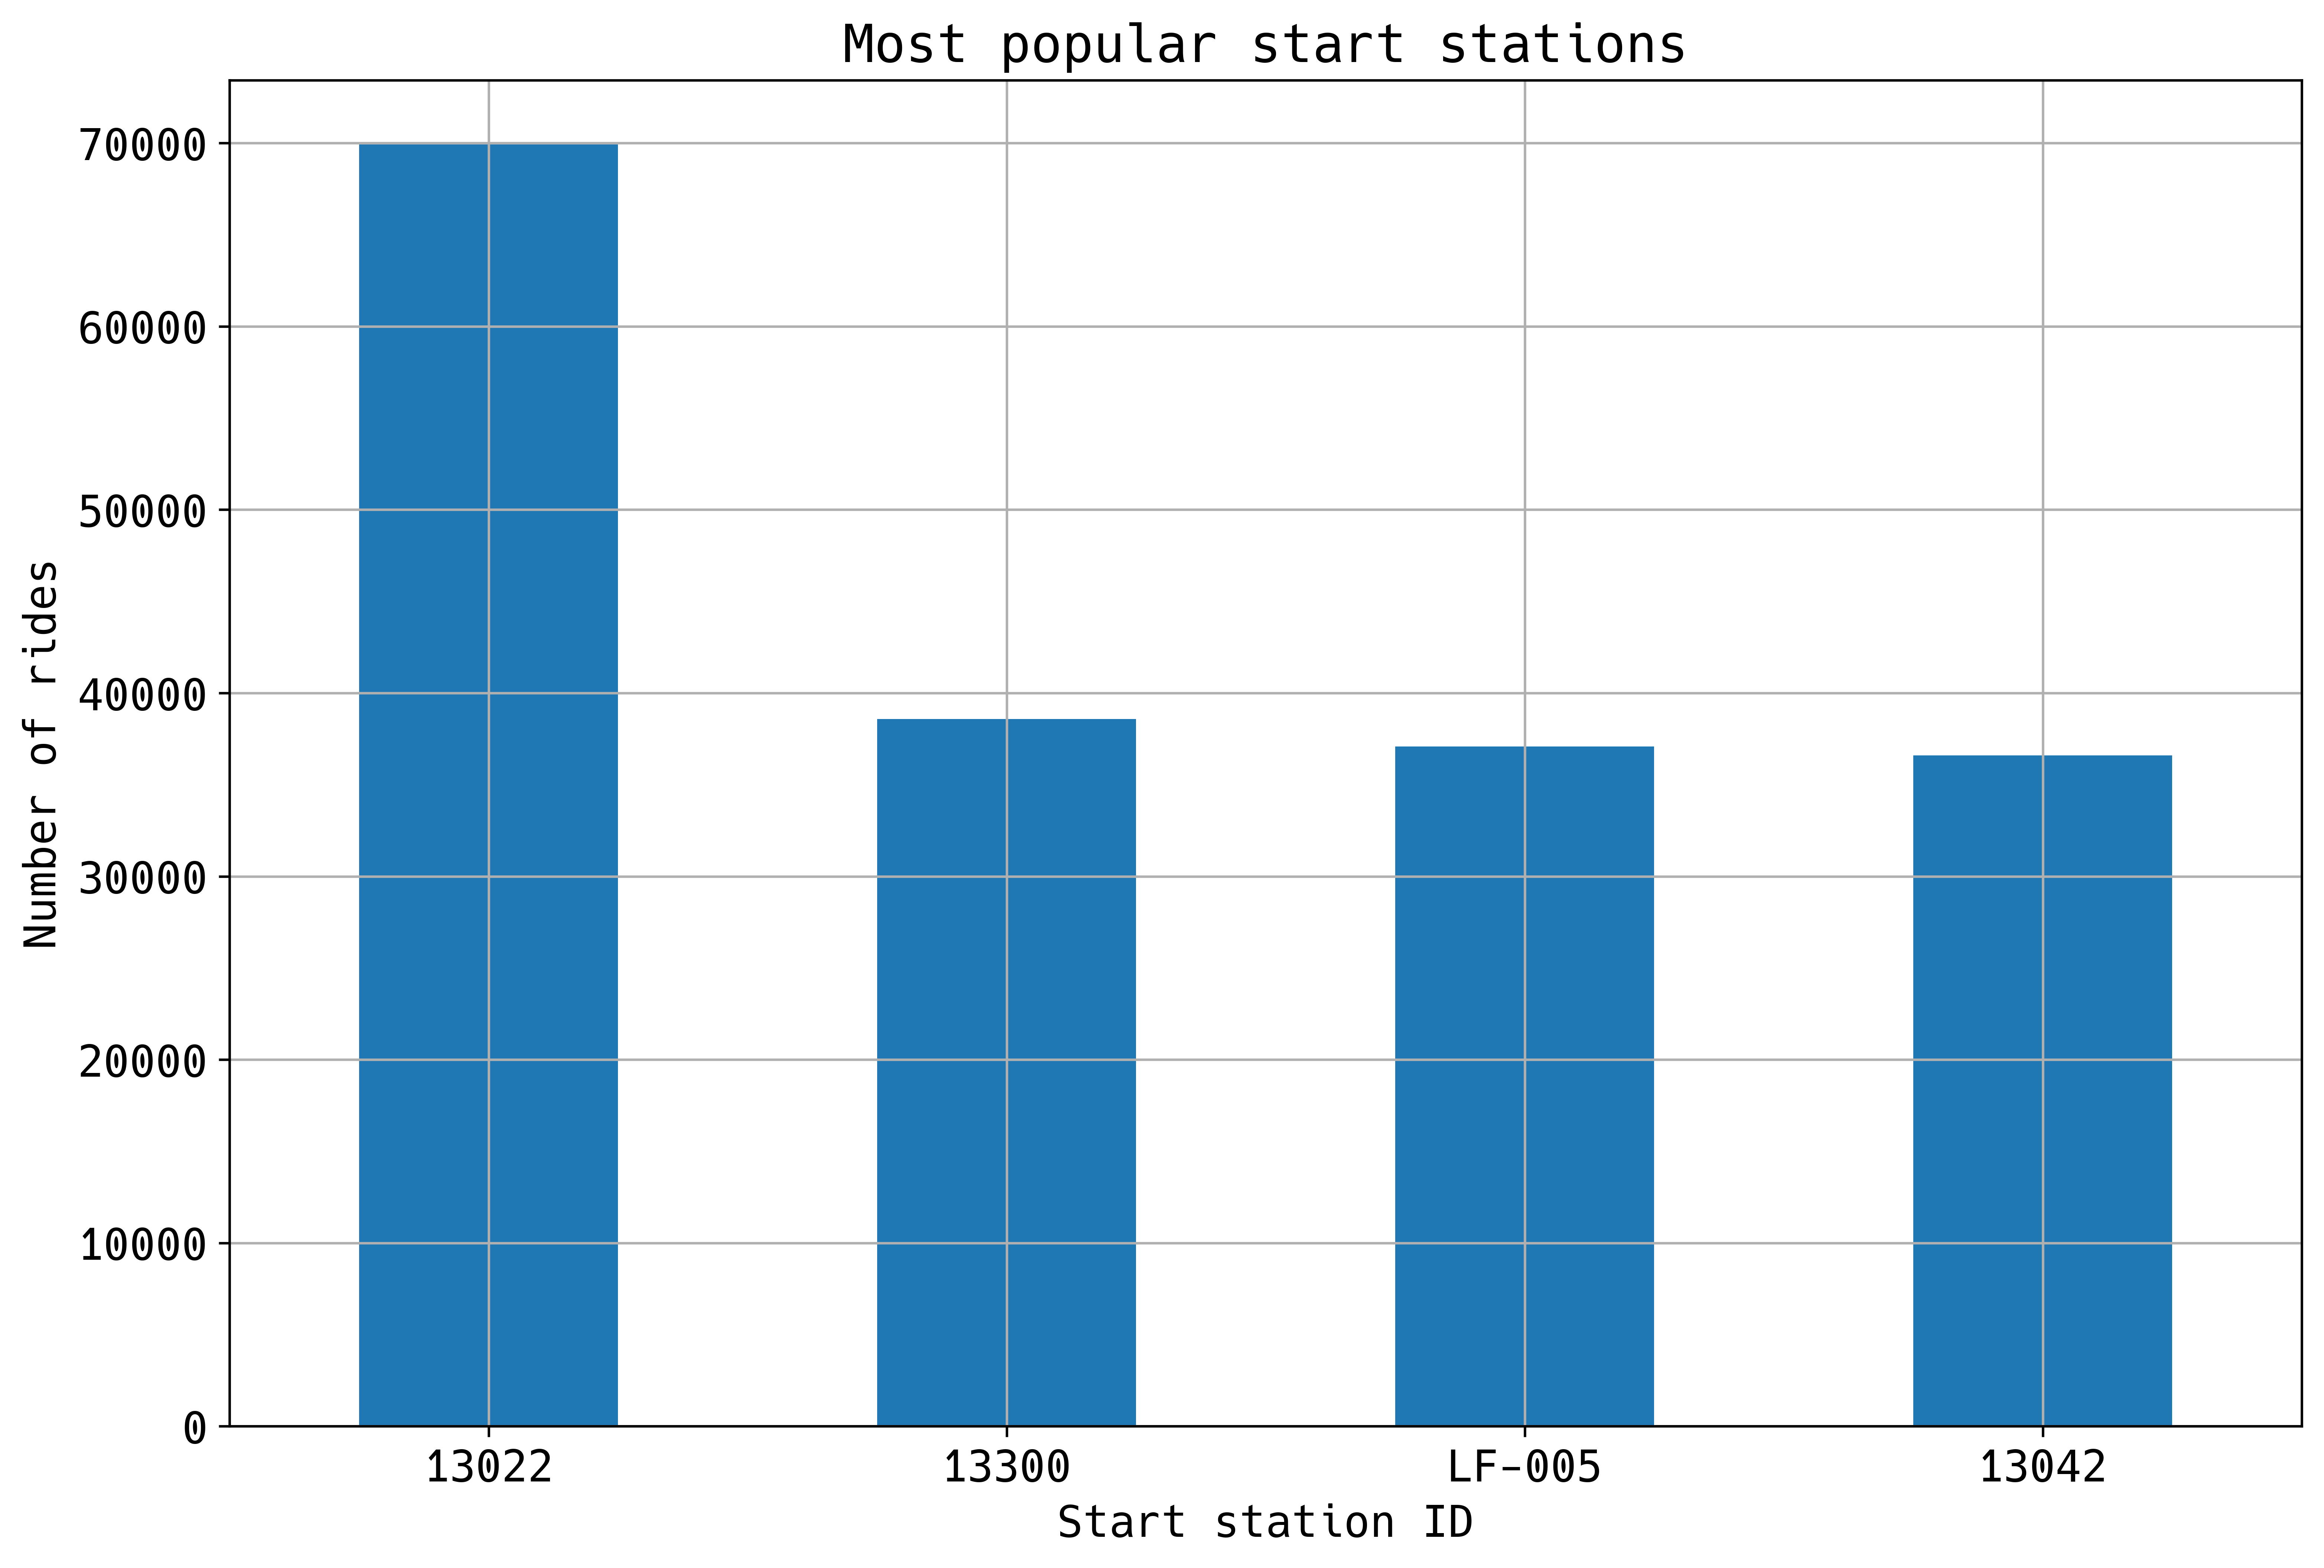

In [76]:
# find the most popular stations
df.groupby(['start_station_id']).size().sort_values(ascending = False).head(4).plot(kind = 'bar')
plt.title('Most popular start stations')
plt.xlabel('Start station ID')
plt.ylabel('Number of rides')
plt.xticks(rotation = 0)
plt.show()

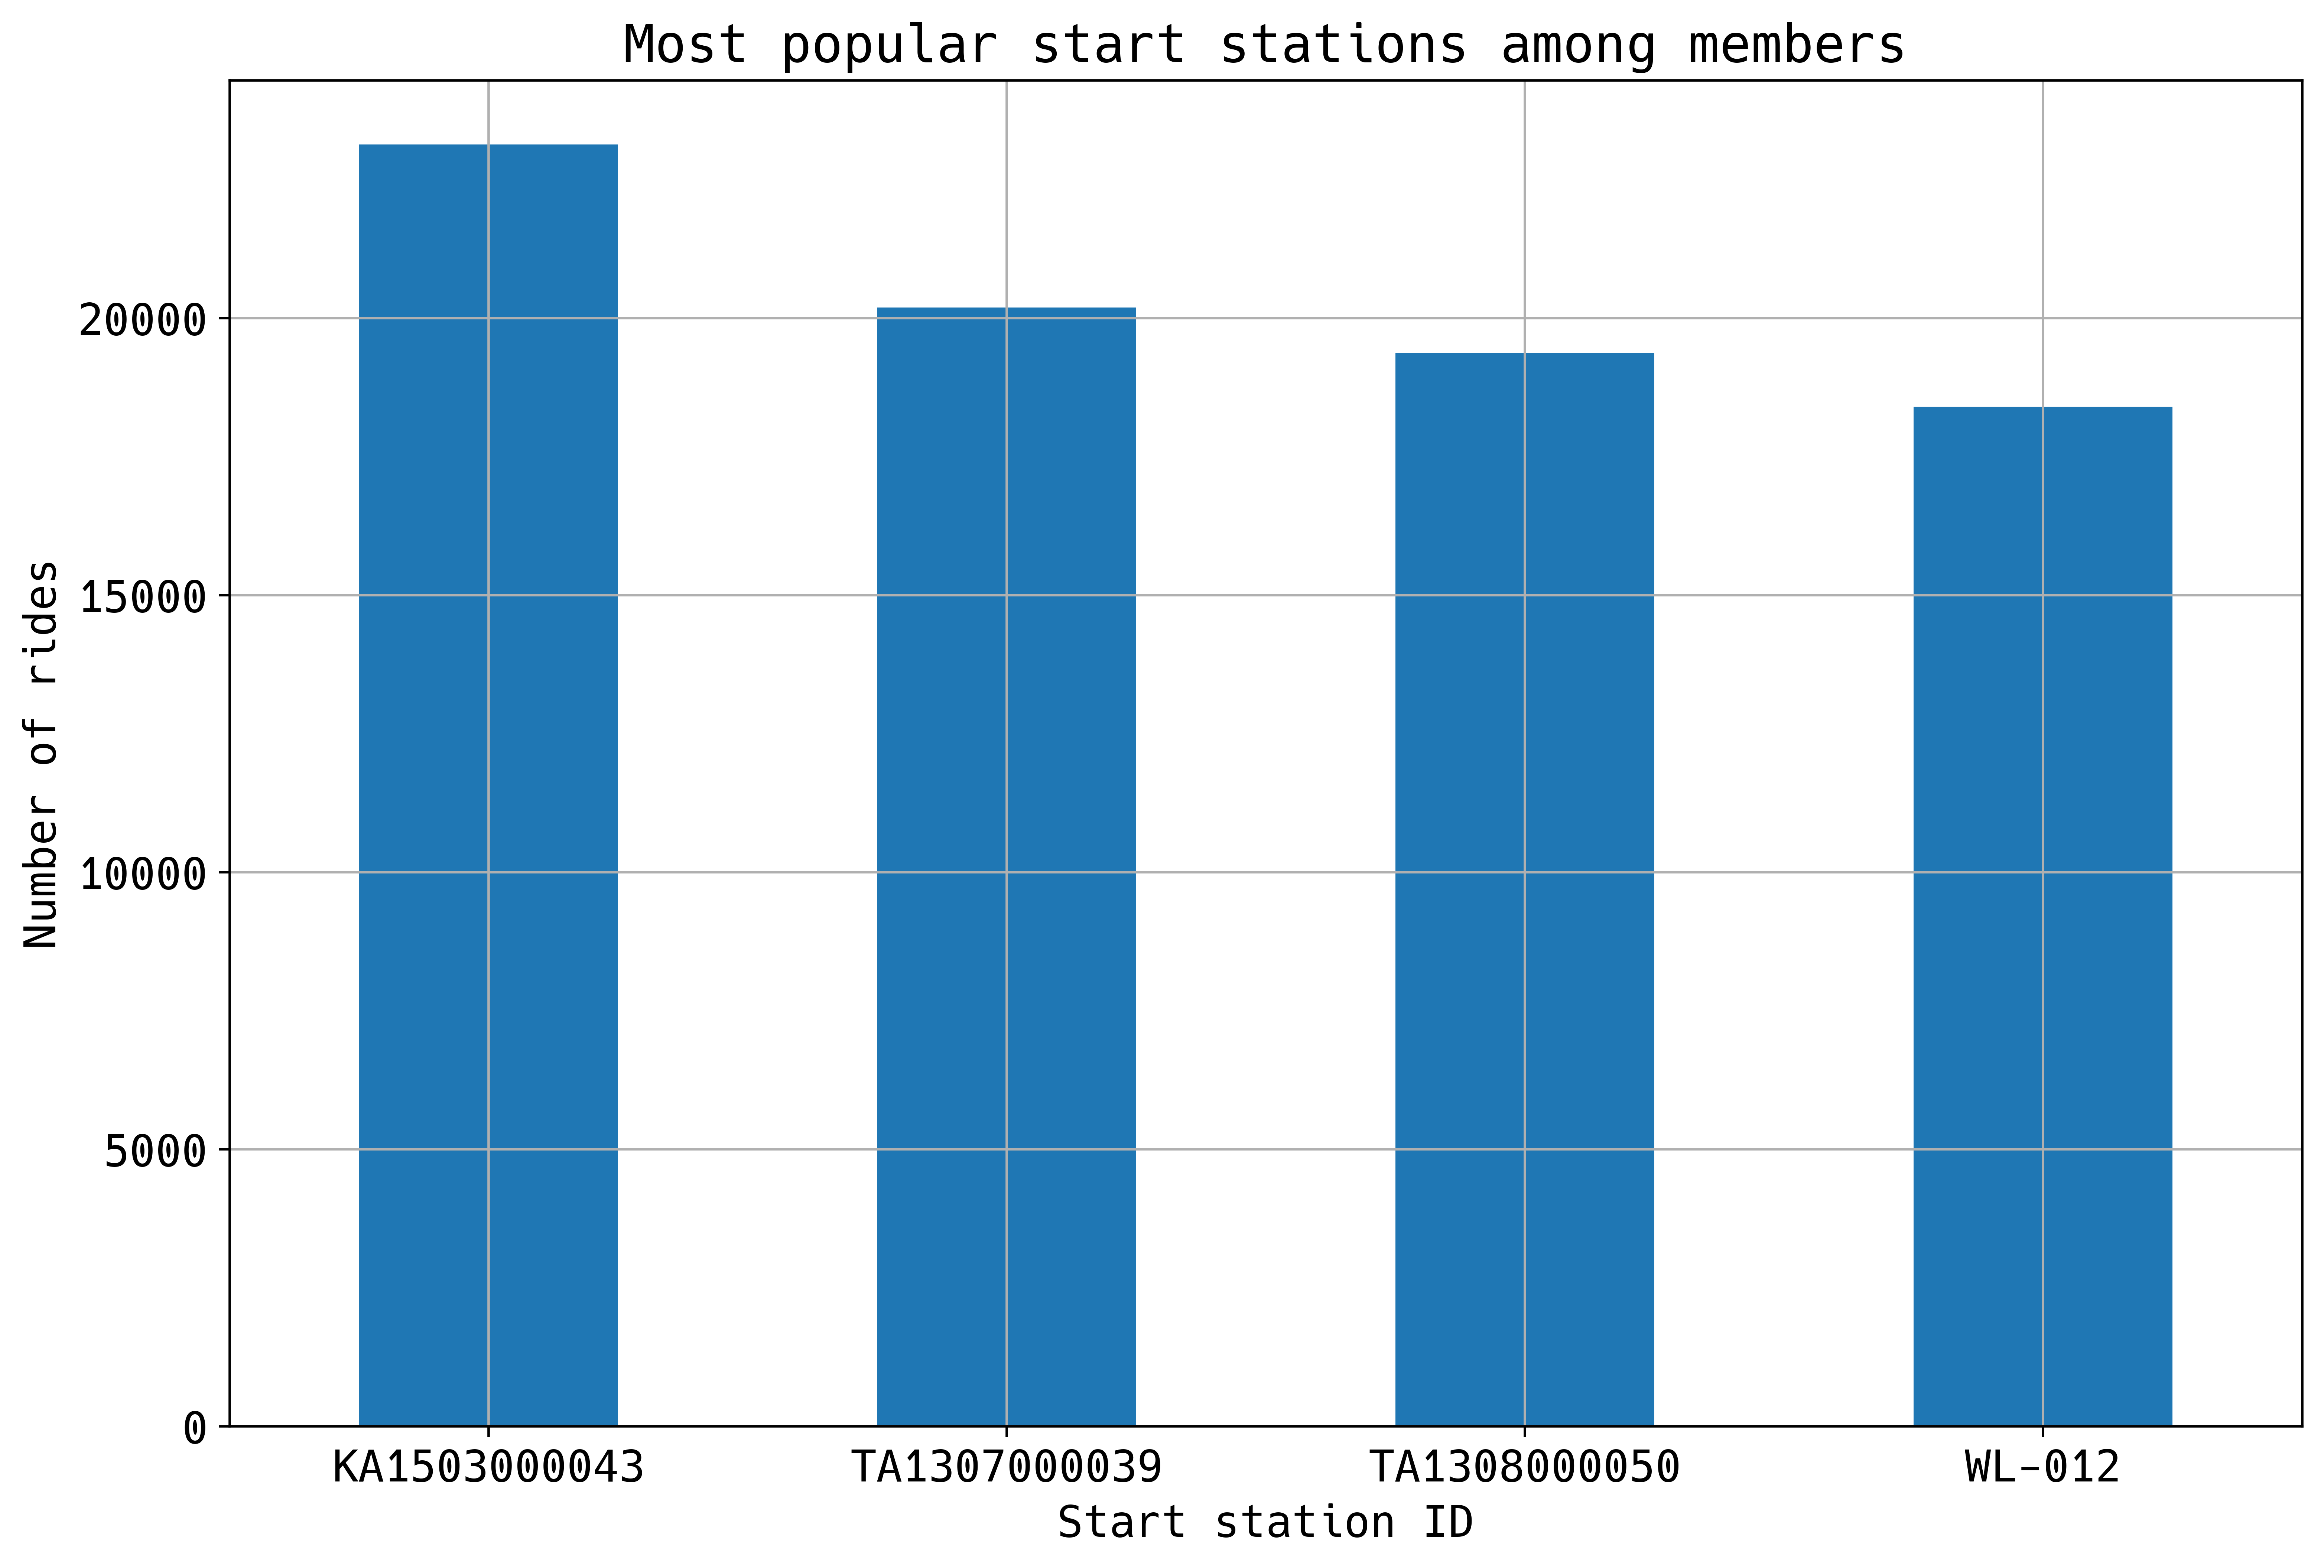

In [77]:
# most popular stations among members
df_member.groupby(['start_station_id']).size().sort_values(ascending = False).head(4).plot(kind = 'bar')
plt.title('Most popular start stations among members')
plt.xlabel('Start station ID')
plt.ylabel('Number of rides')
plt.xticks(rotation = 0)
plt.show()

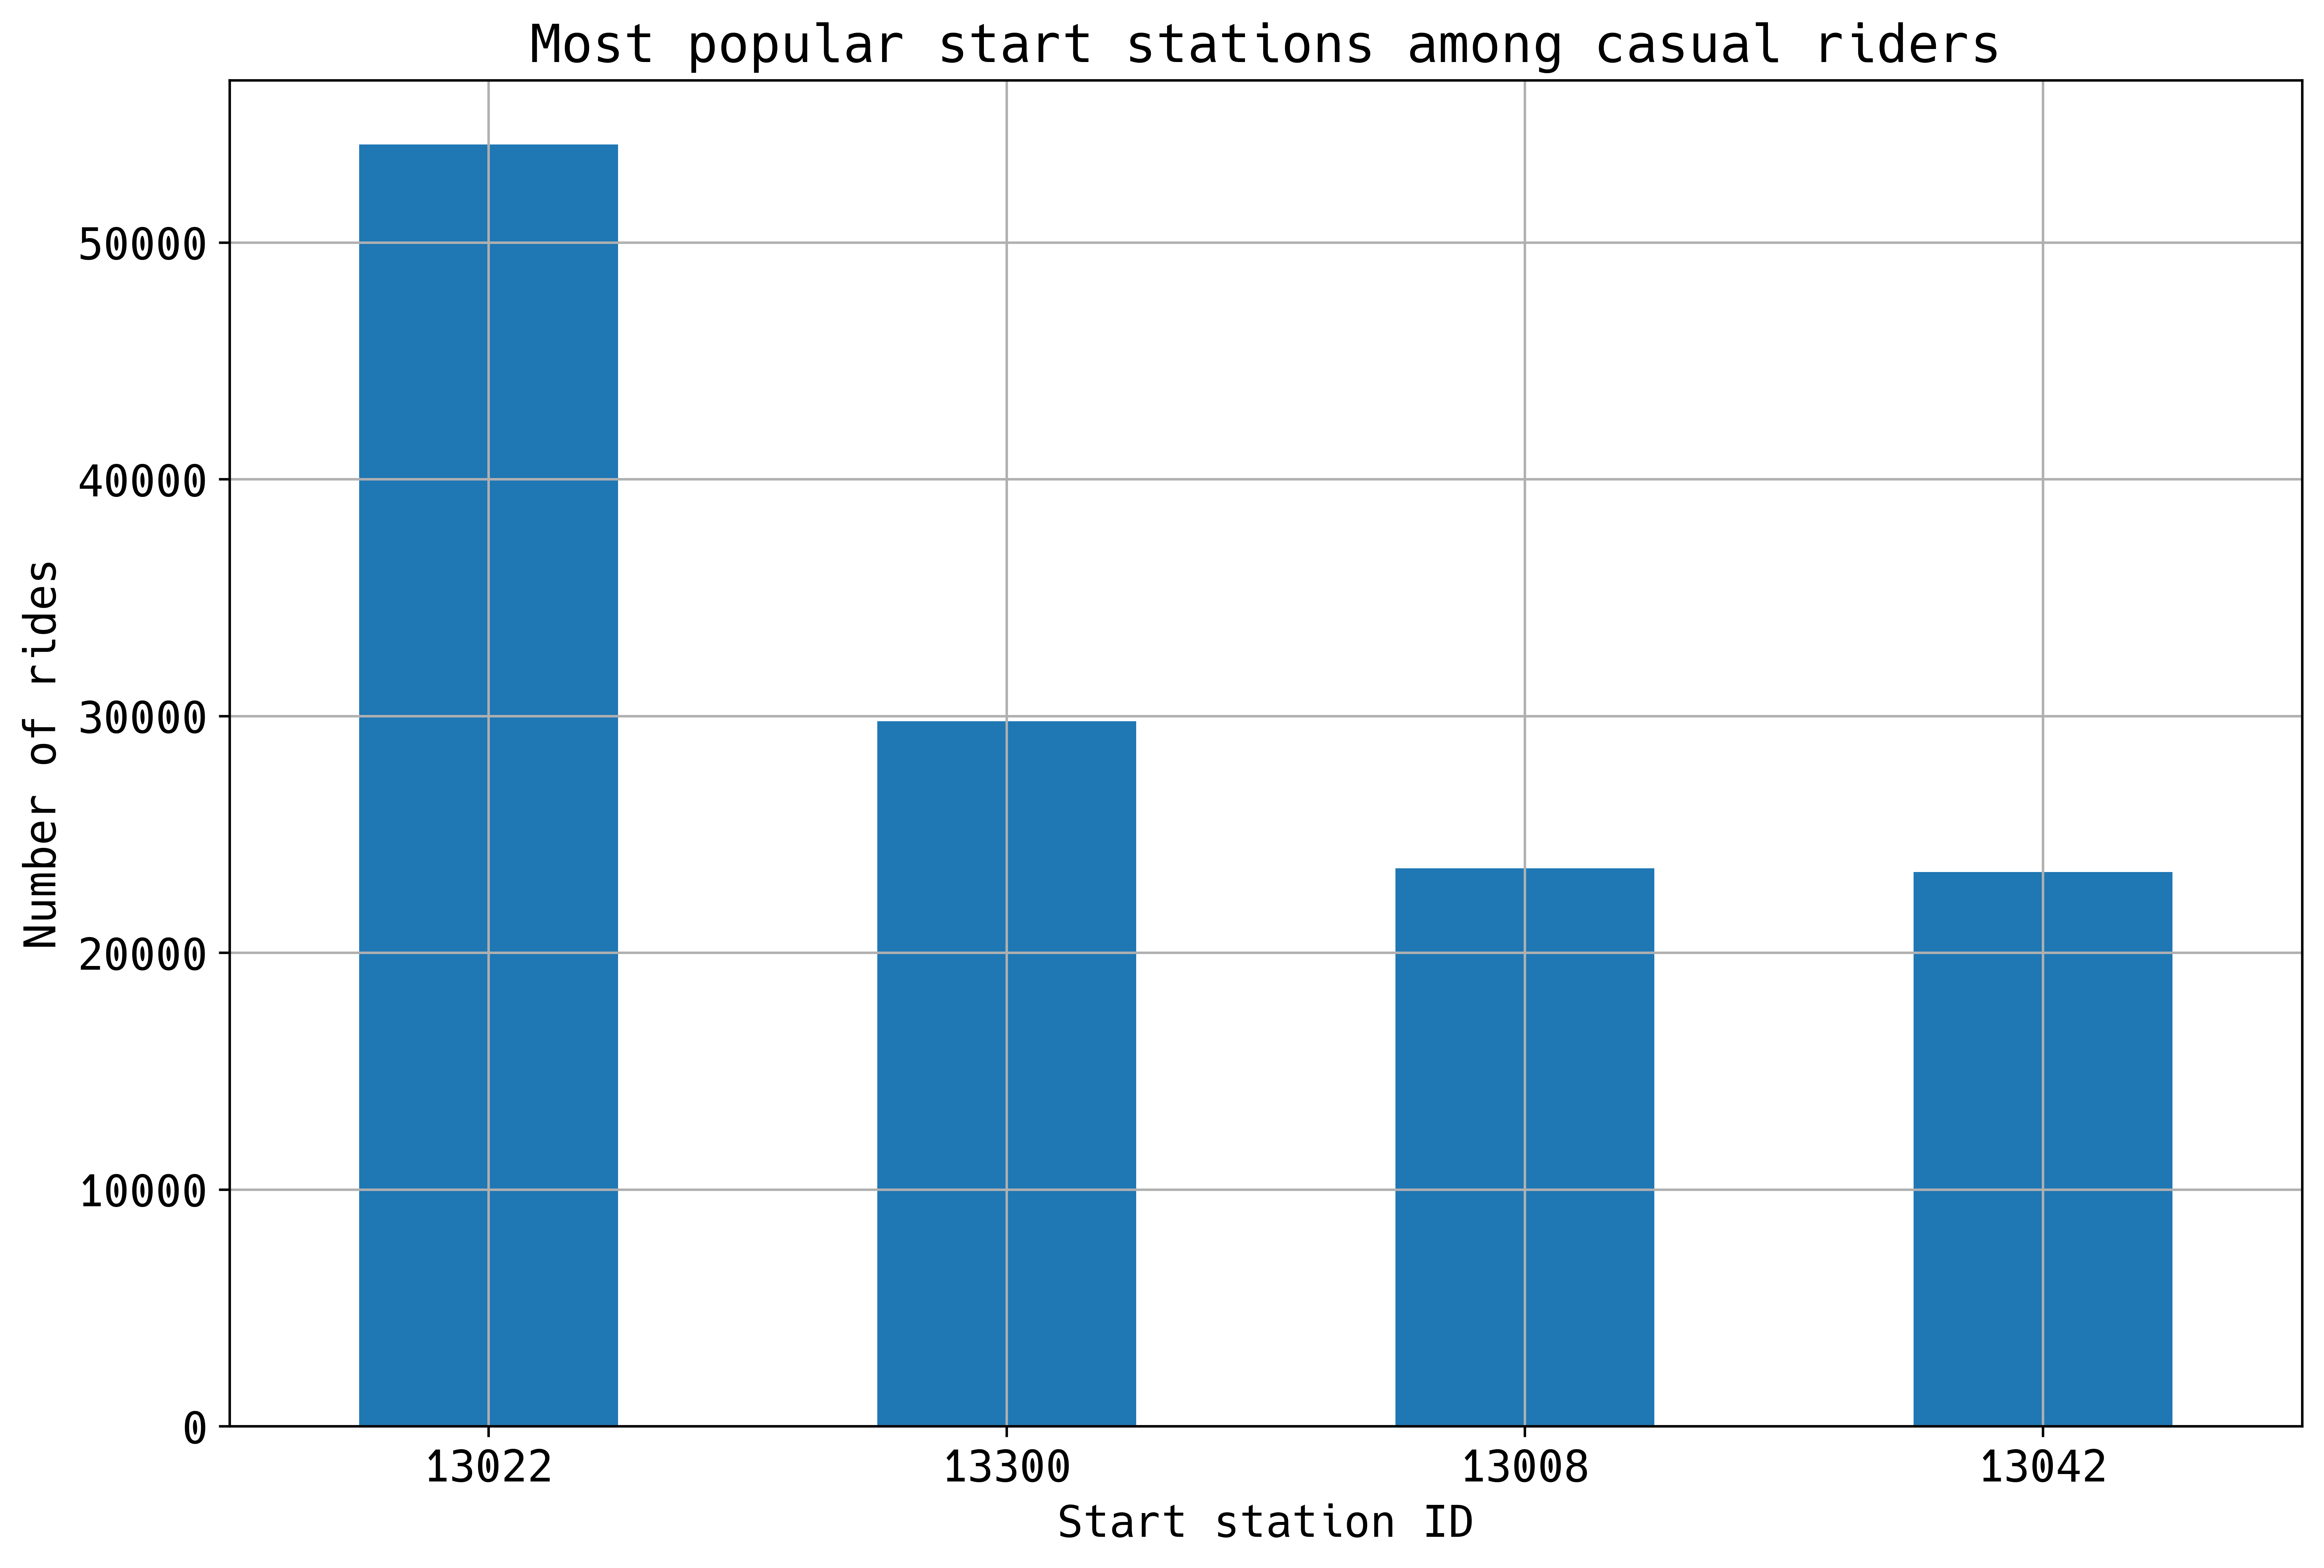

In [78]:
# popular stations among casual riders
df_casual.groupby(['start_station_id']).size().sort_values(ascending = False).head(4).plot(kind = 'bar')
plt.title('Most popular start stations among casual riders')
plt.xlabel('Start station ID')
plt.ylabel('Number of rides')
plt.xticks(rotation = 0)
plt.show()

## Numbers of rides for each month

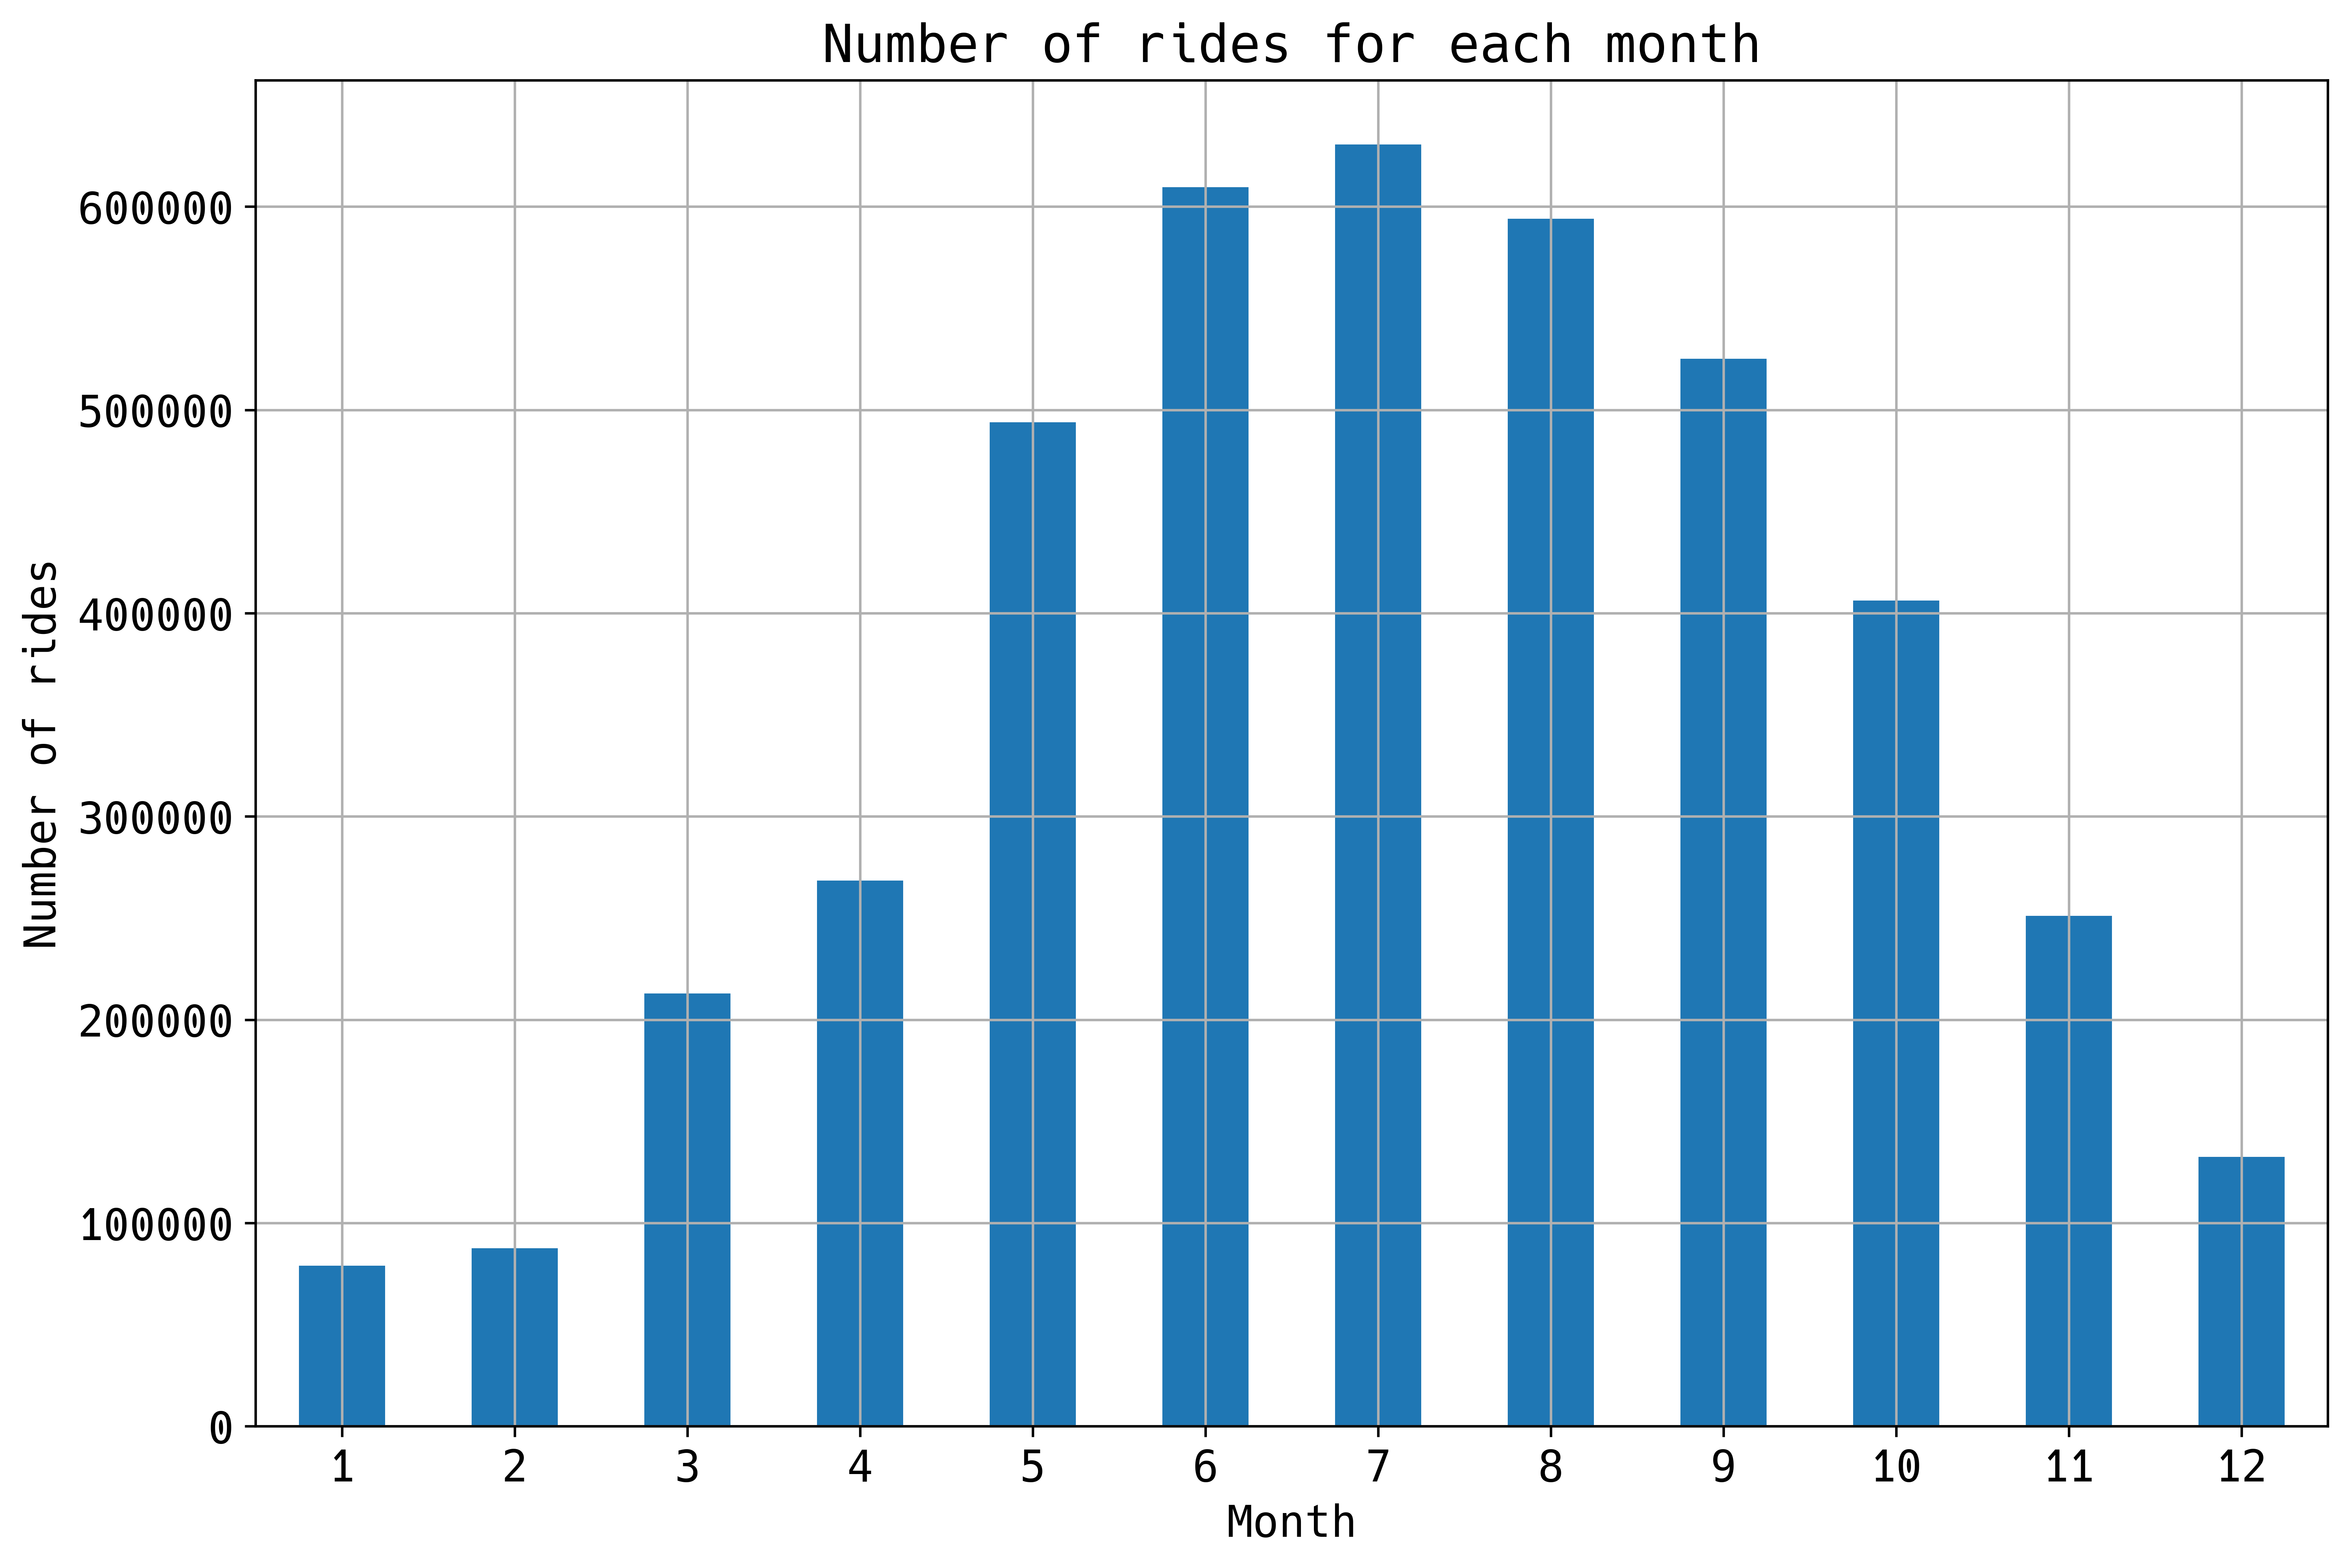

In [79]:
# create a column start_month to extracts the month from the started_at column
df['start_month'] = pd.to_datetime(df['started_at']).dt.month
# plot number of rides for each month
df.groupby(['start_month']).size().plot(kind = 'bar')
plt.title('Number of rides for each month')
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.xticks(rotation = 0)
plt.show()

/tmp/ipykernel_169233/102815128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_member['start_month'] = pd.to_datetime(df_member['started_at']).dt.month


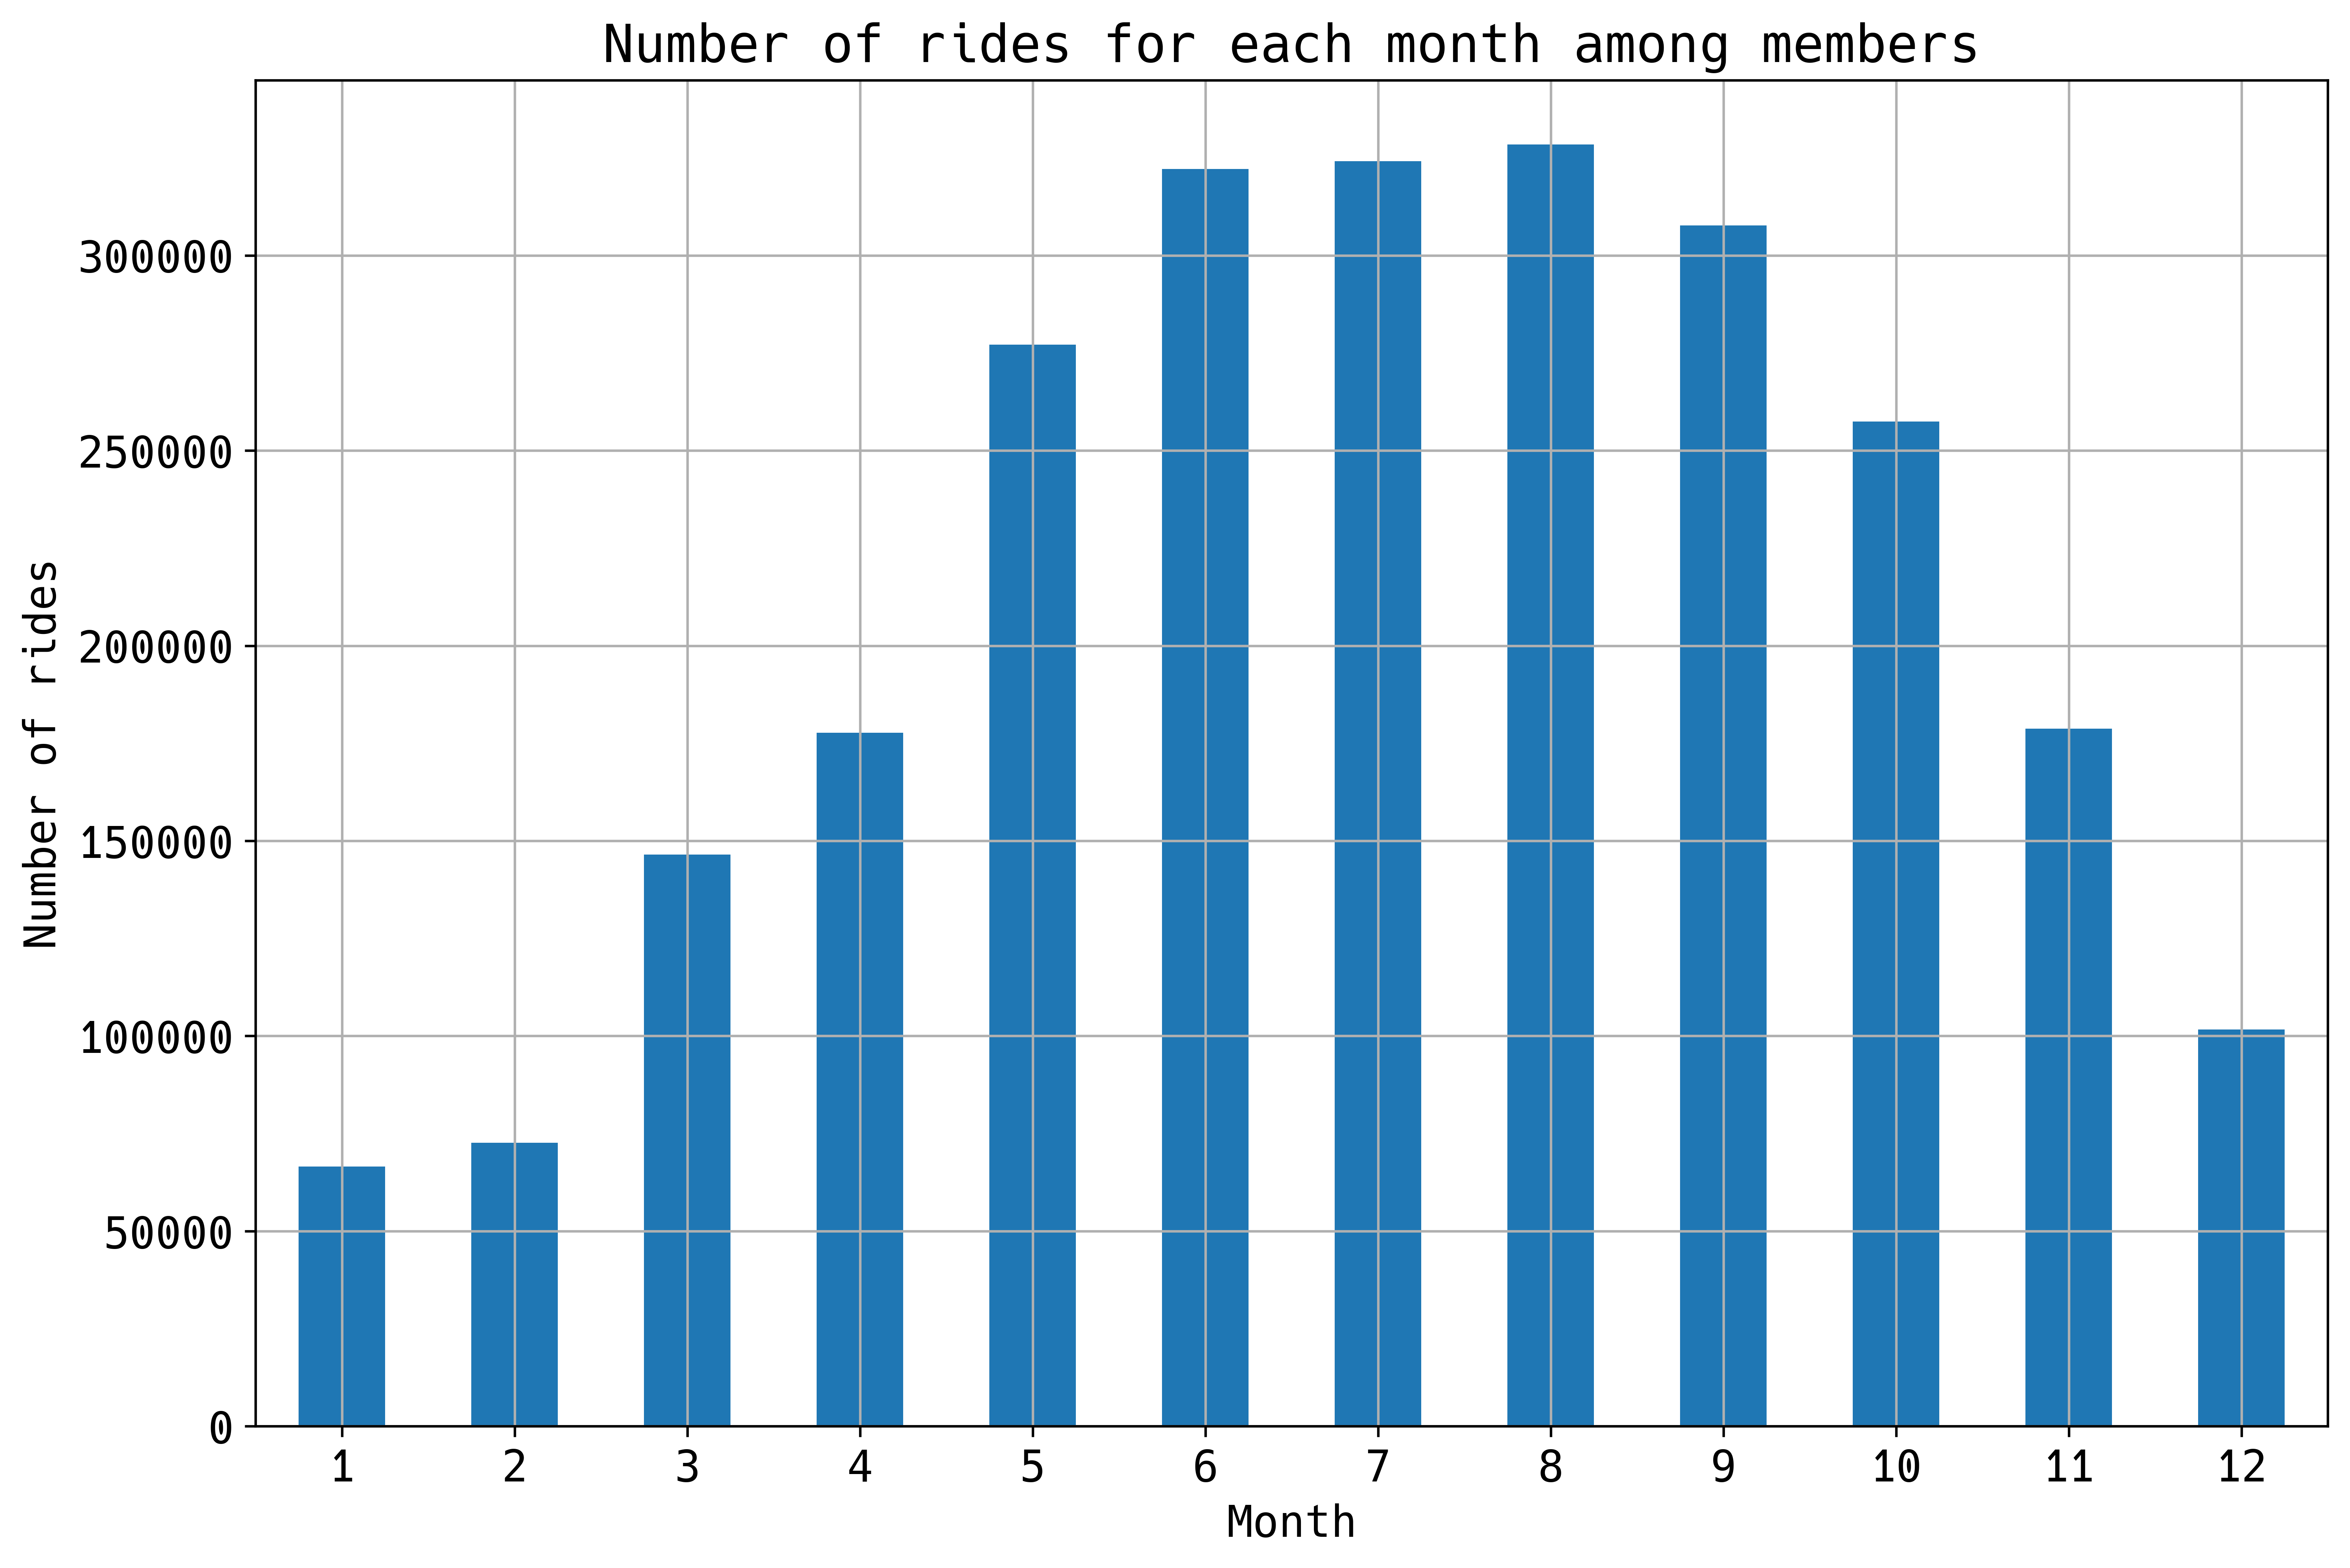

In [80]:
# create a column start_month to extracts the month from the started_at column
df_member['start_month'] = pd.to_datetime(df_member['started_at']).dt.month
# plot number of rides for each month
df_member.groupby(['start_month']).size().plot(kind = 'bar')
plt.title('Number of rides for each month among members')
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.xticks(rotation = 0)
plt.show()

/tmp/ipykernel_169233/3210921594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casual['start_month'] = pd.to_datetime(df_casual['started_at']).dt.month


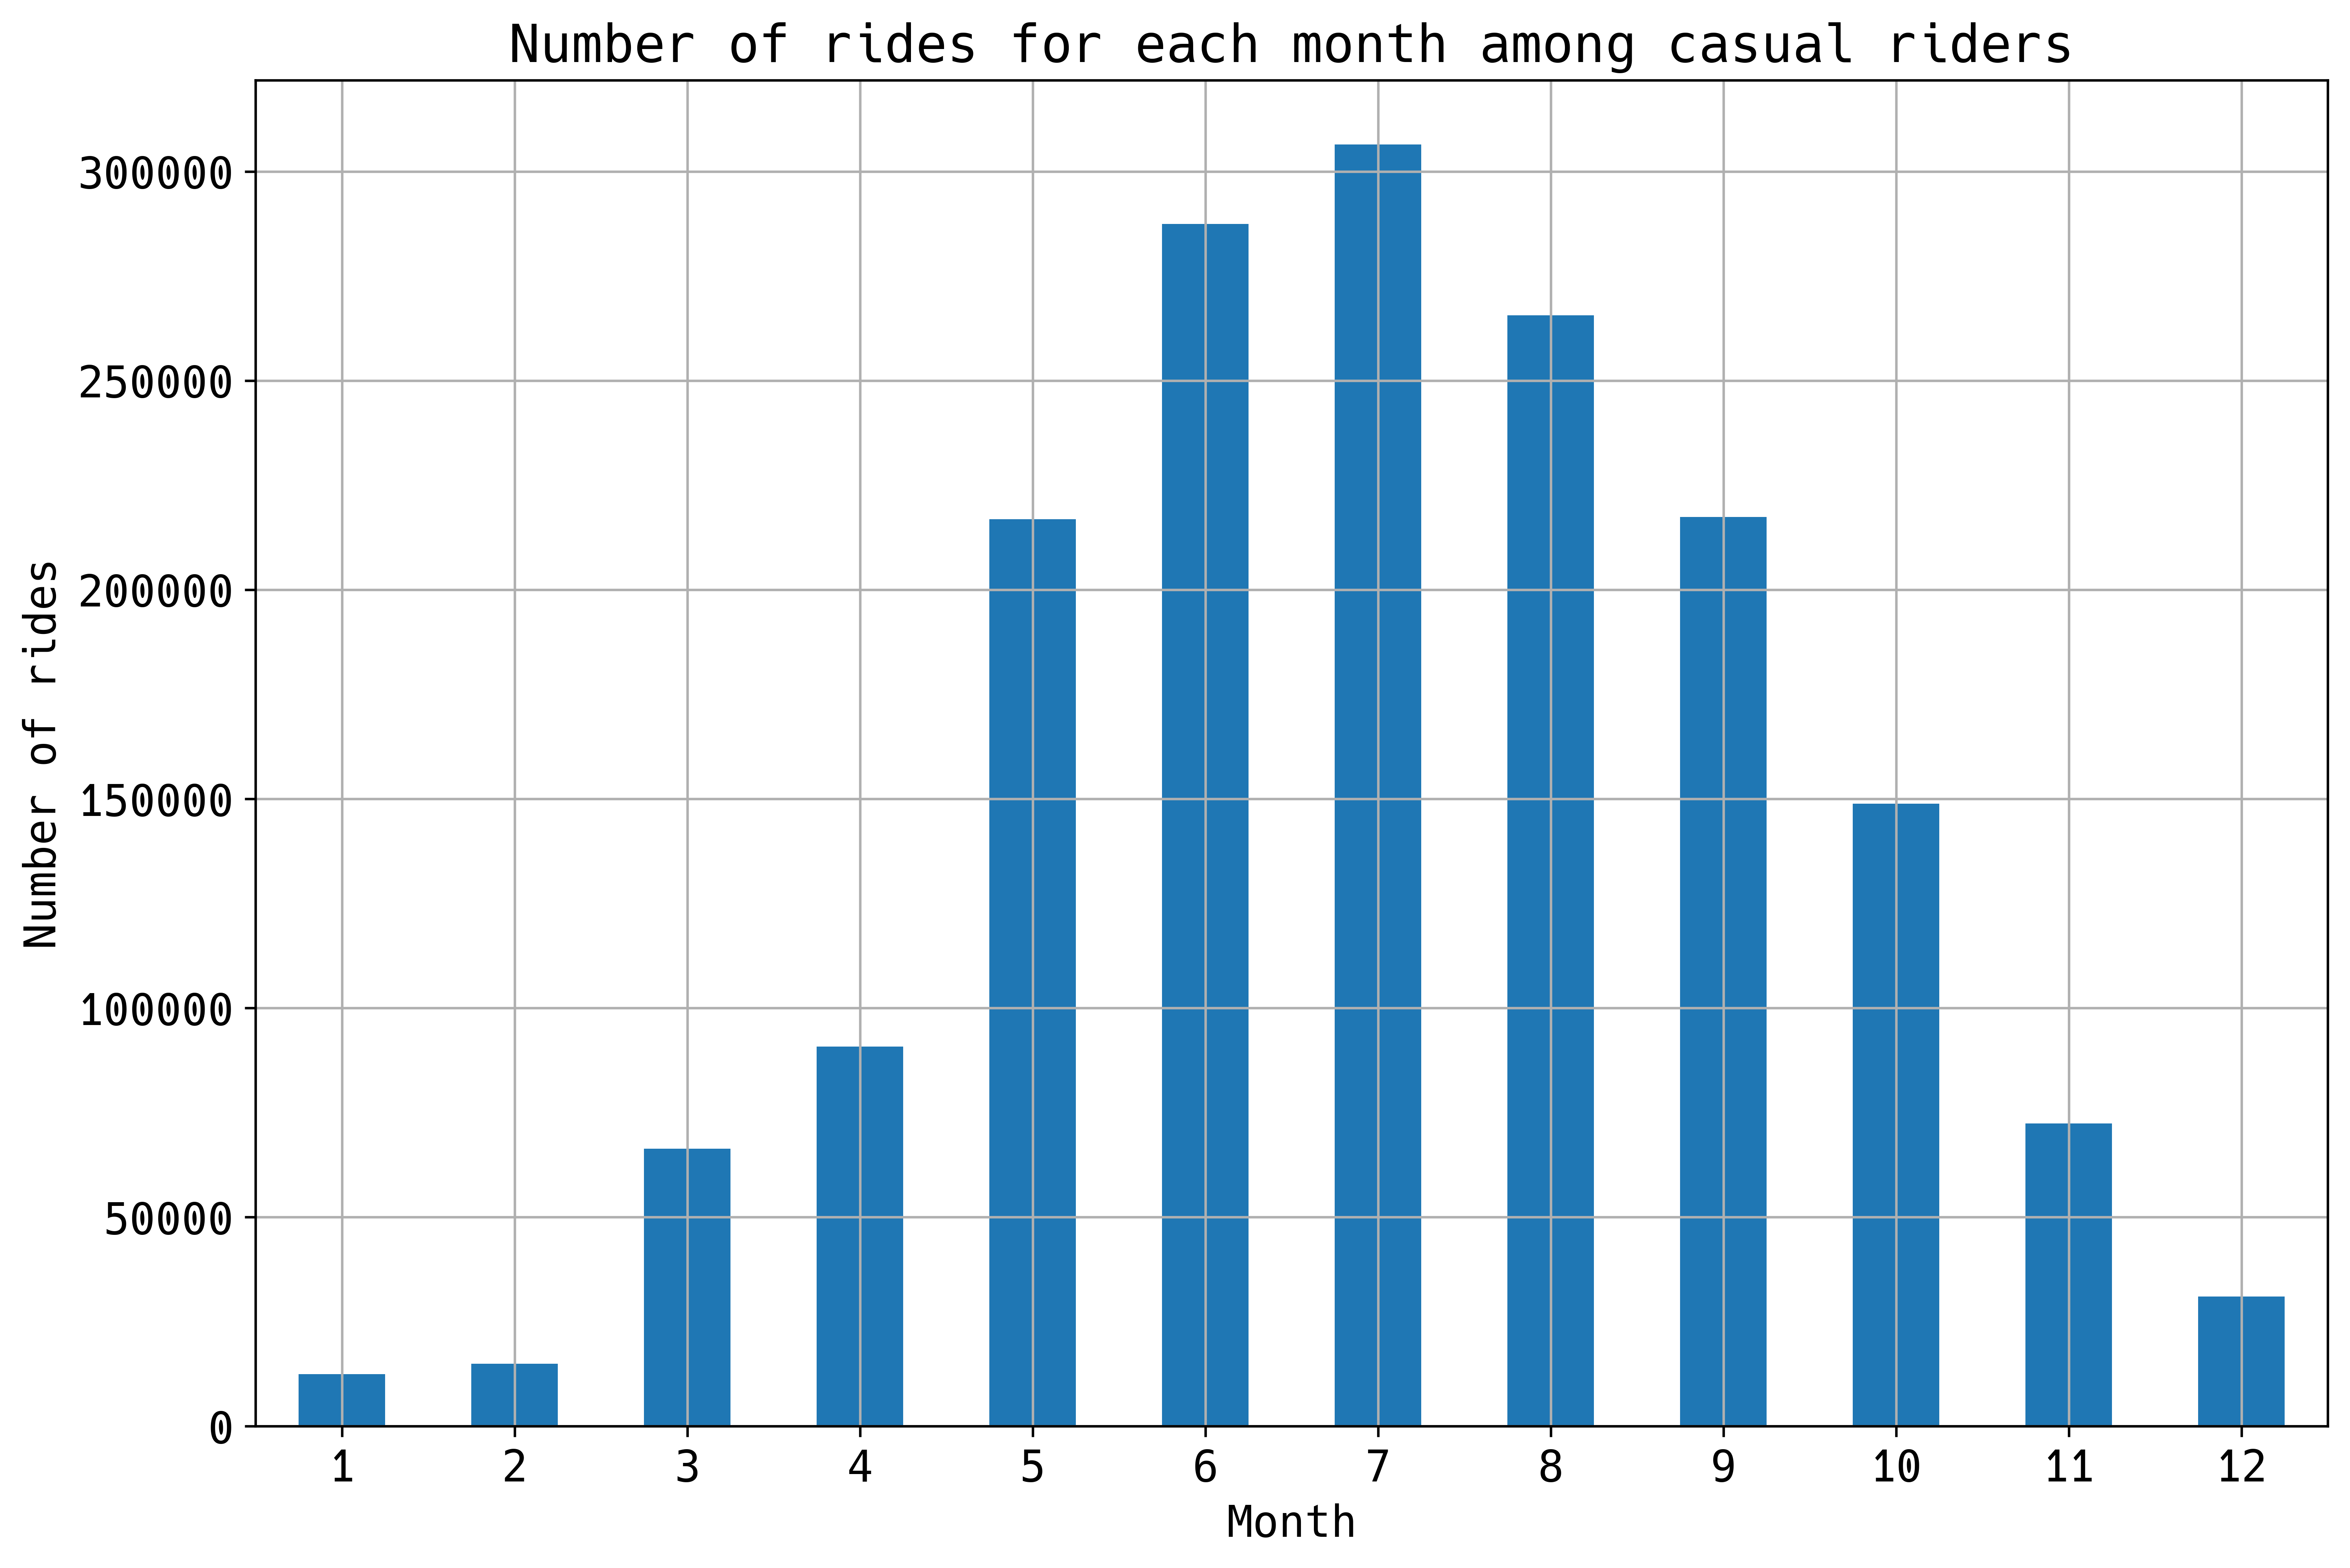

In [81]:
df_casual['start_month'] = pd.to_datetime(df_casual['started_at']).dt.month
# plot number of rides for each month
df_casual.groupby(['start_month']).size().plot(kind = 'bar')
plt.title('Number of rides for each month among casual riders')
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.xticks(rotation = 0)
plt.show()


## Numbers of rides for each hour of the day

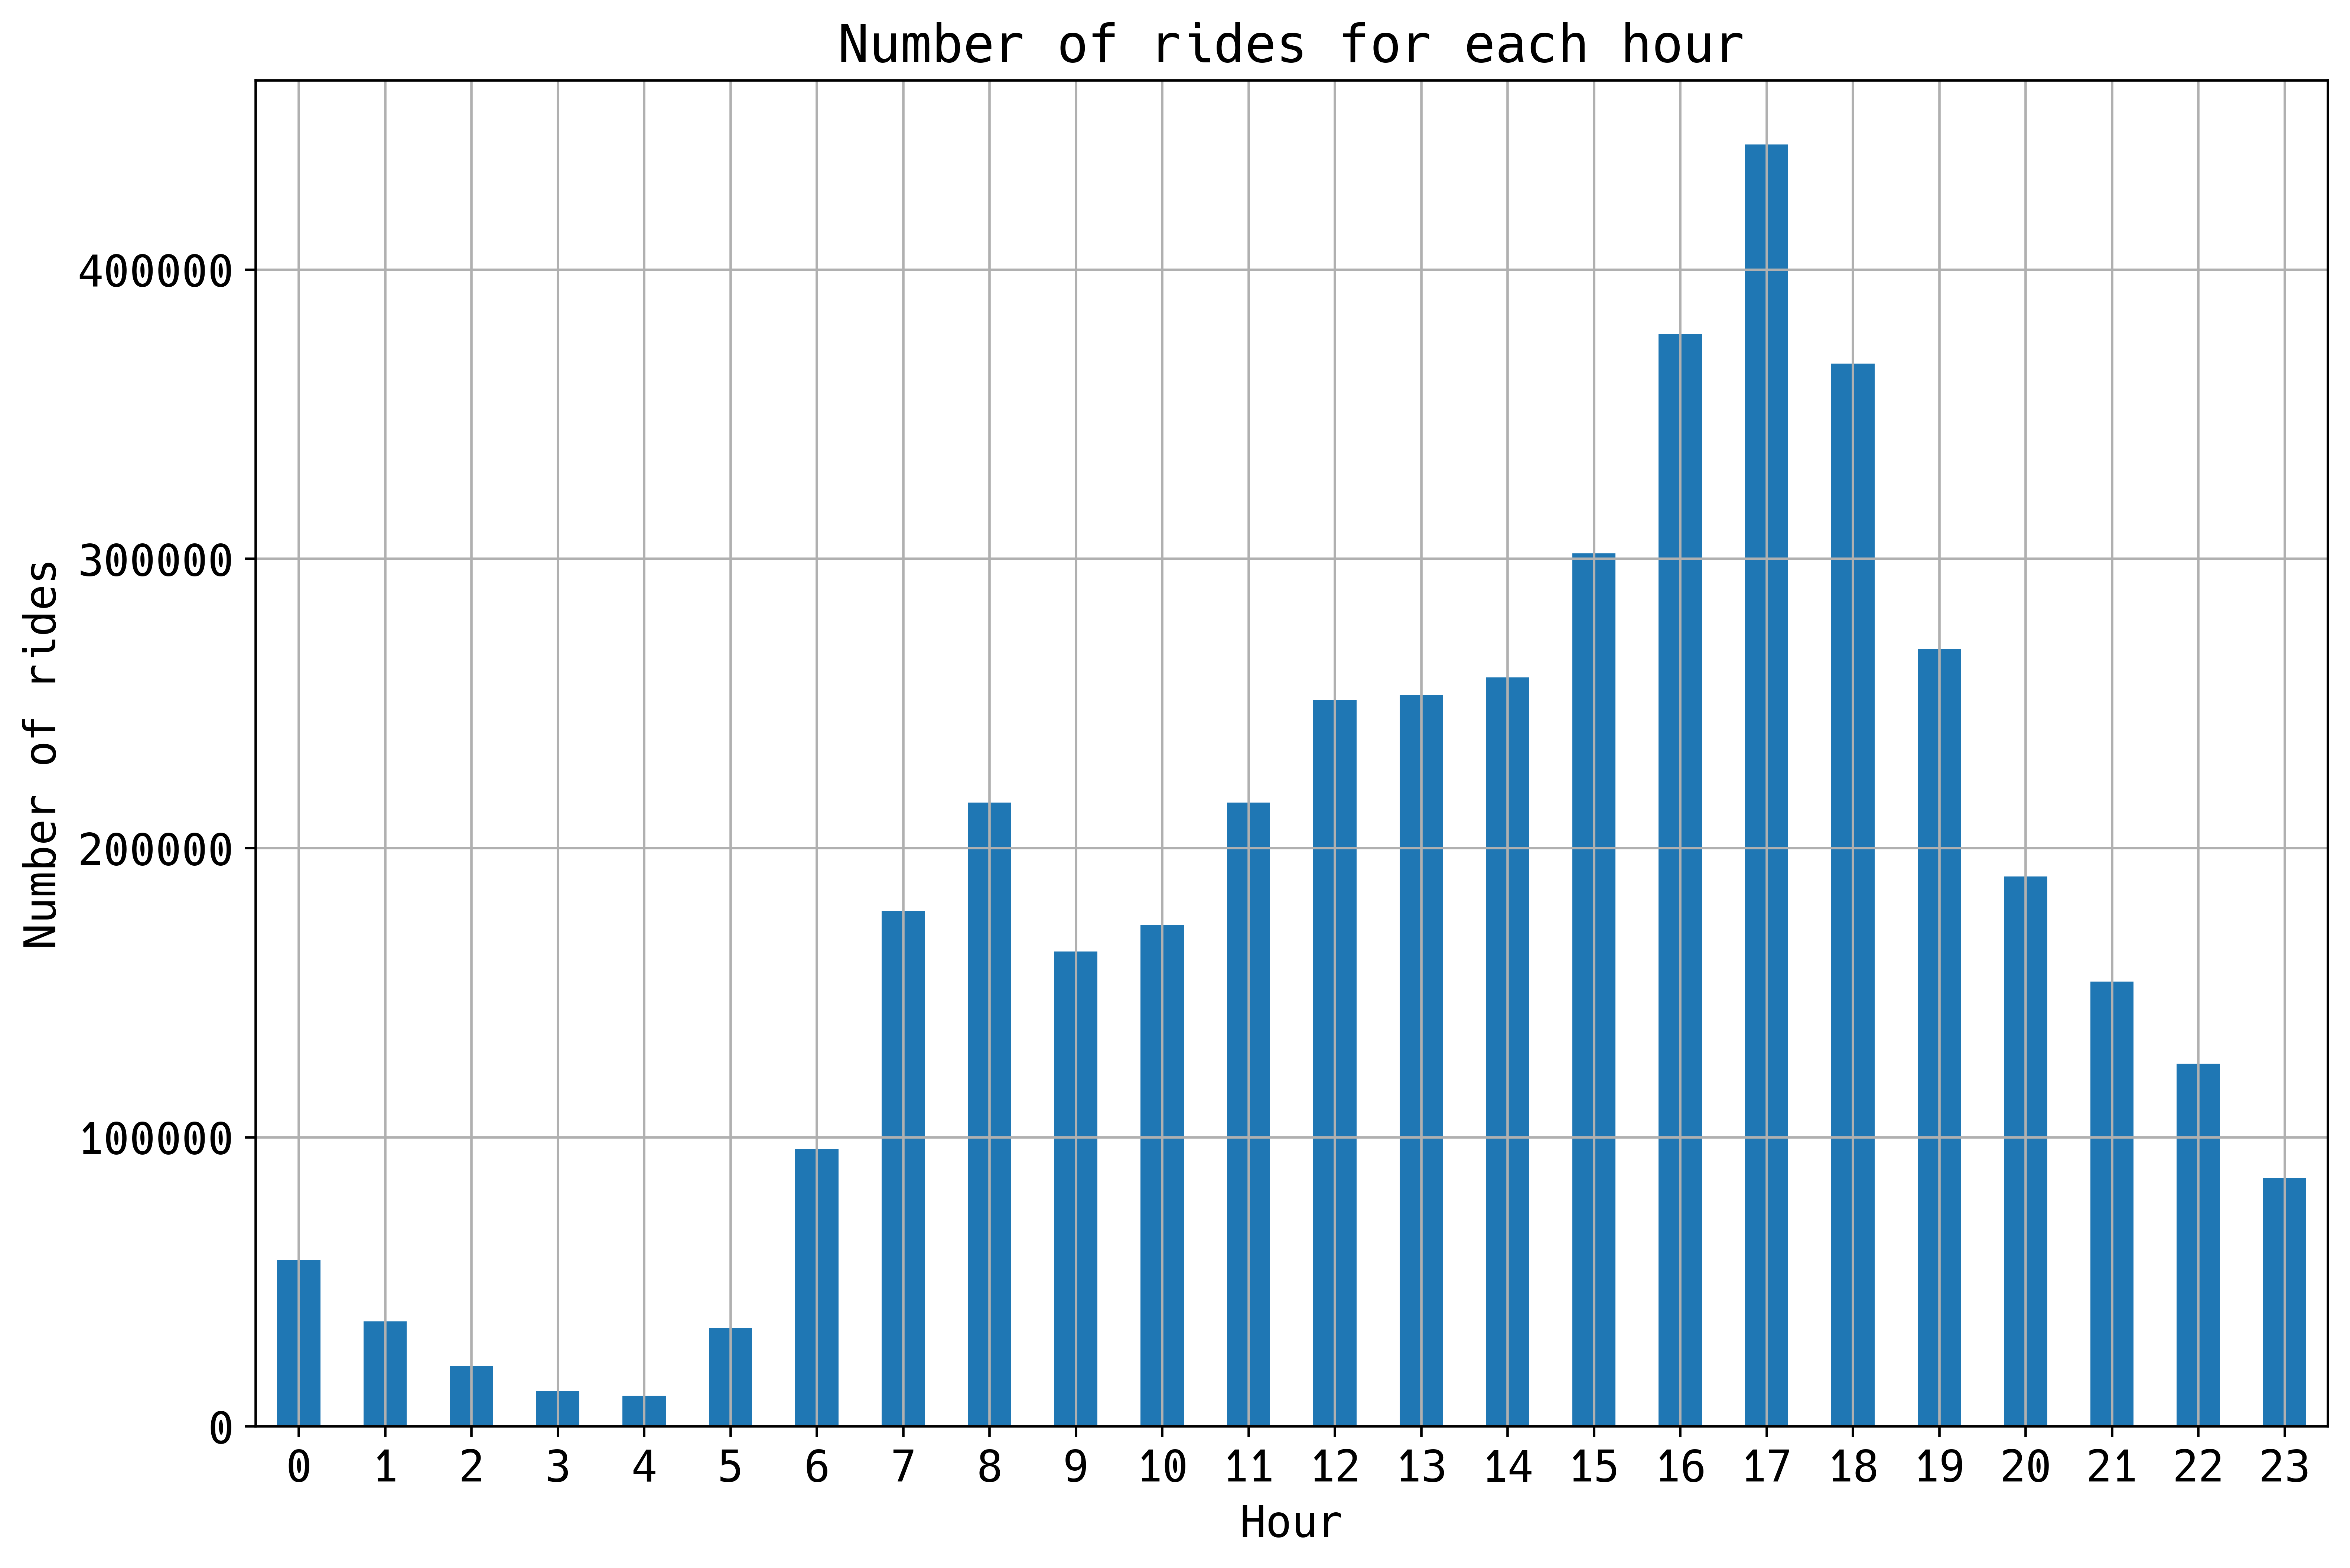

In [82]:
# create start_hour column to extract the hour from the started_at column
df['start_hour'] = pd.to_datetime(df['started_at']).dt.hour
df.groupby(['start_hour']).size().plot(kind = 'bar')
plt.title('Number of rides for each hour')
plt.xlabel('Hour')
plt.ylabel('Number of rides')
plt.xticks(rotation = 0)
plt.show()

/tmp/ipykernel_169233/974740522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_member['start_hour'] = pd.to_datetime(df_member['started_at']).dt.hour


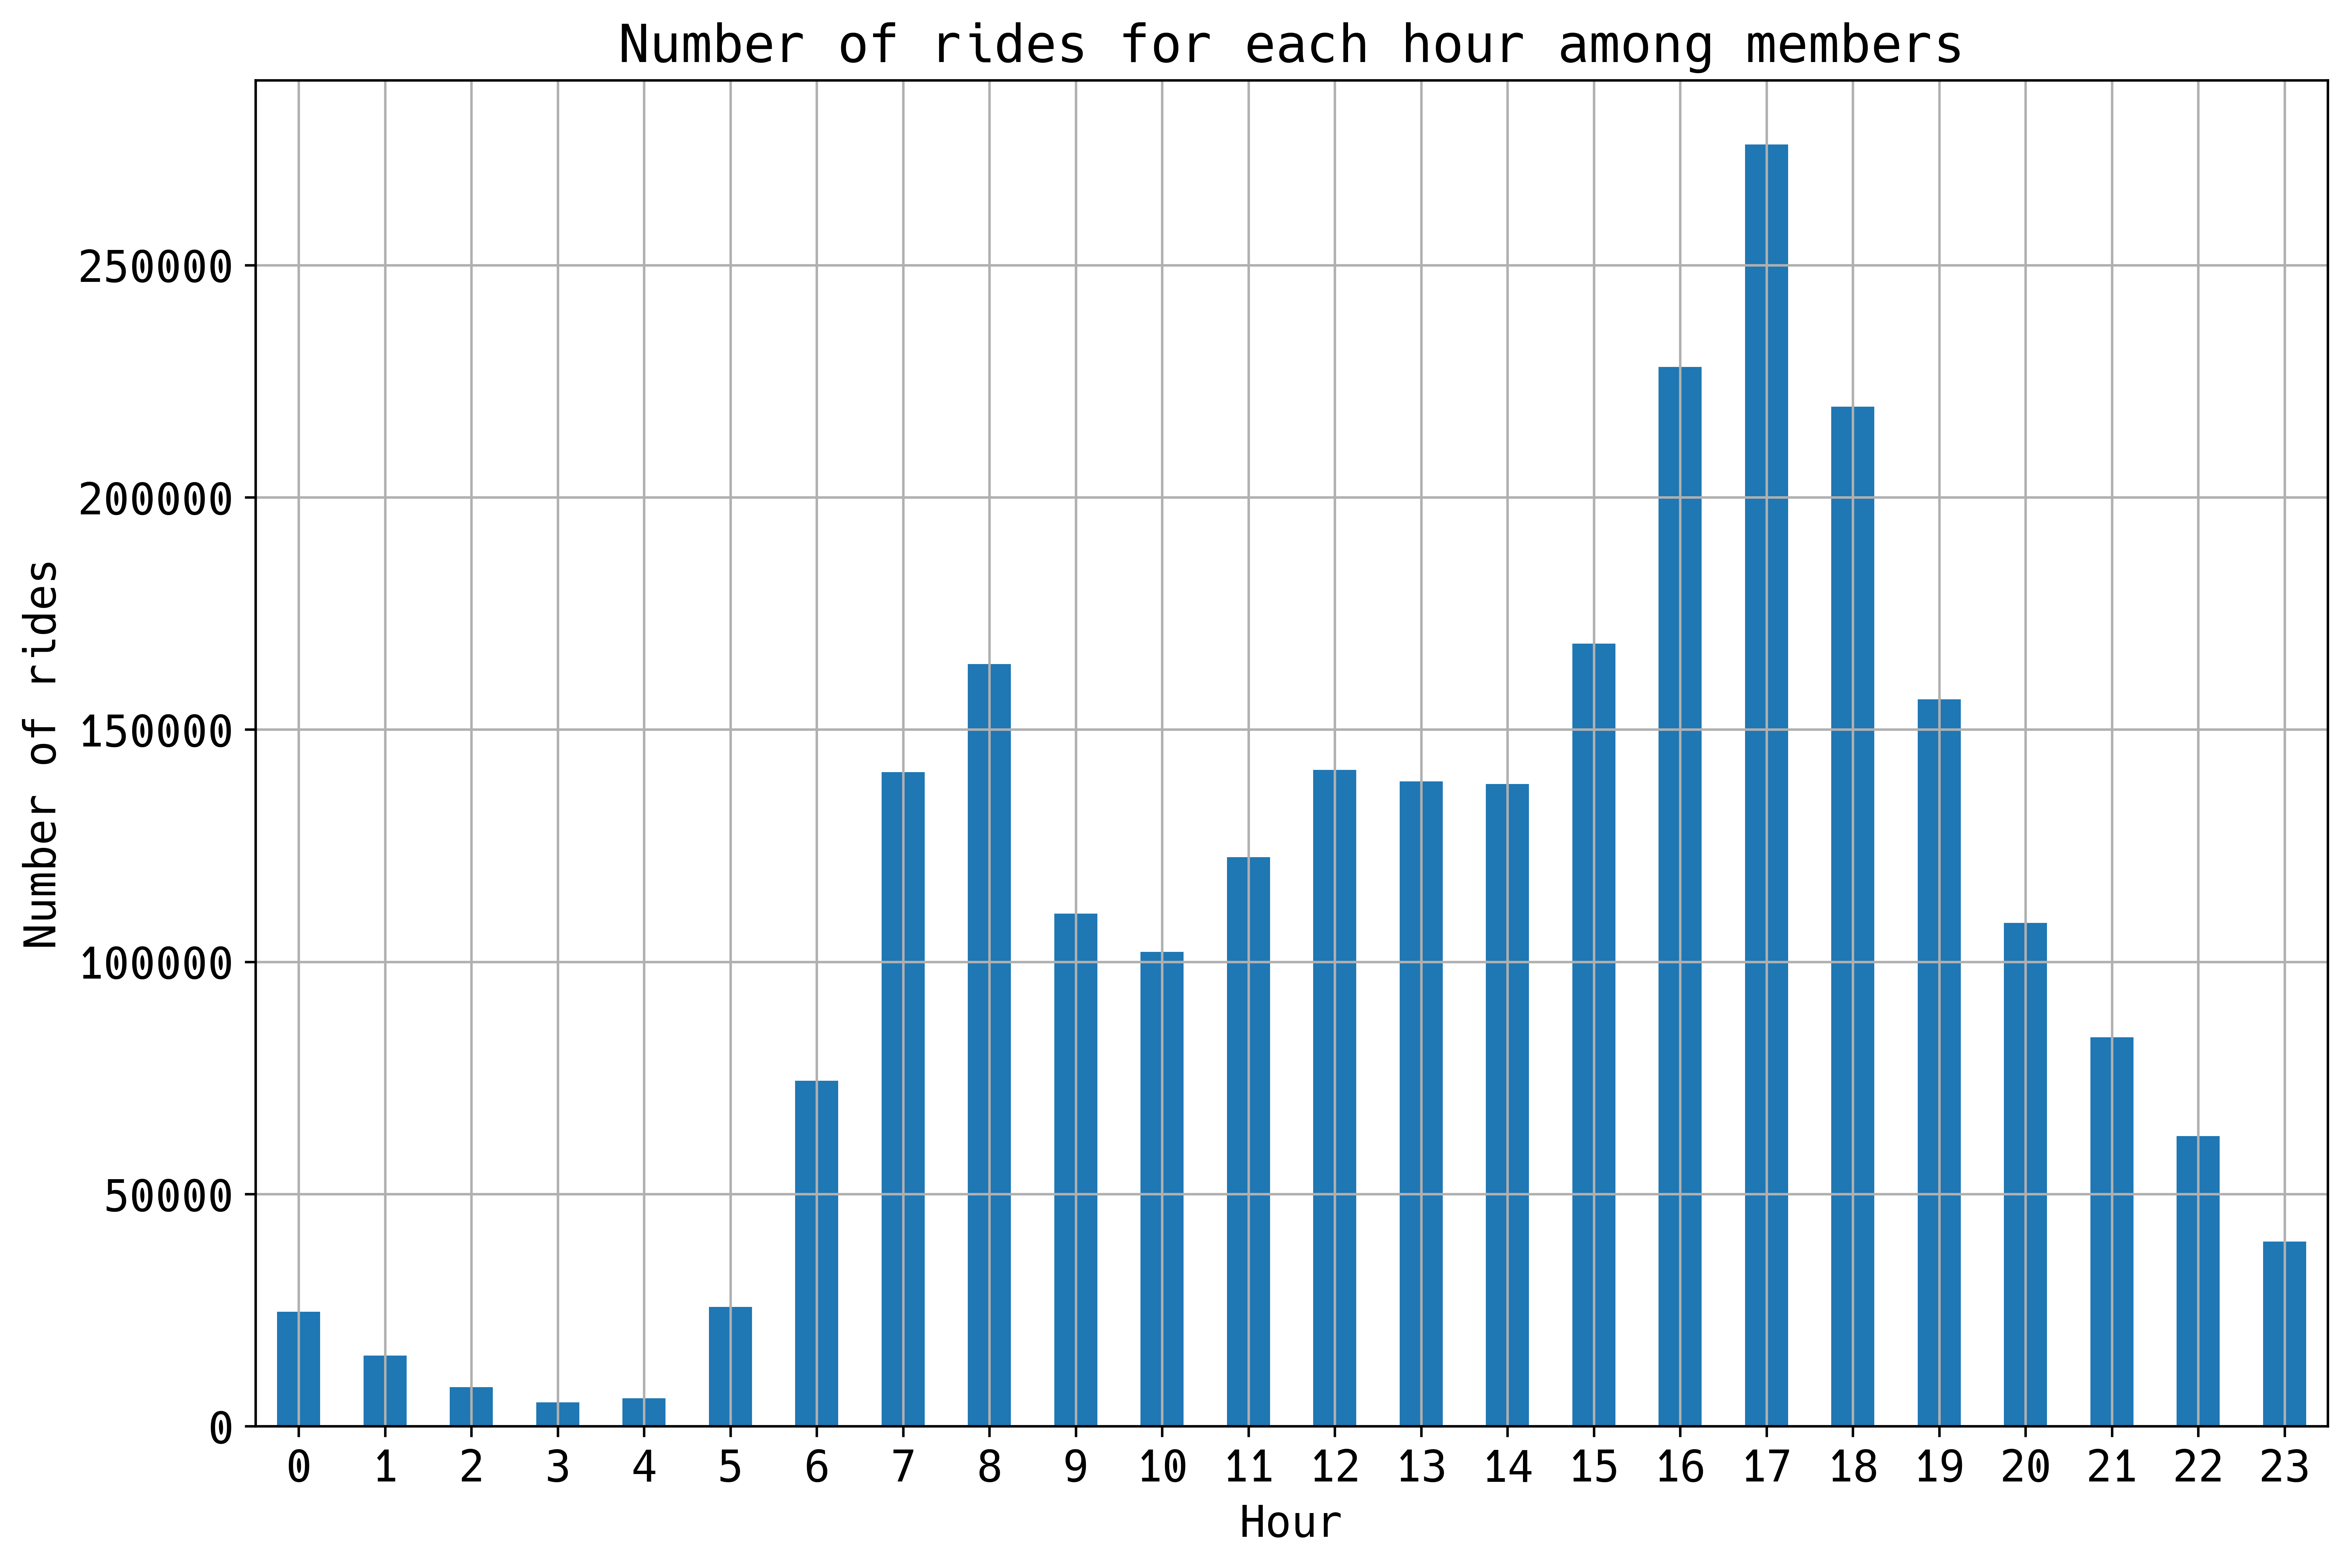

In [83]:
df_member['start_hour'] = pd.to_datetime(df_member['started_at']).dt.hour
df_member.groupby(['start_hour']).size().plot(kind = 'bar')
plt.title('Number of rides for each hour among members')
plt.xlabel('Hour')
plt.ylabel('Number of rides')
plt.xticks(rotation = 0)
plt.show()

/tmp/ipykernel_169233/1128848232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casual['start_hour'] = pd.to_datetime(df_casual['started_at']).dt.hour


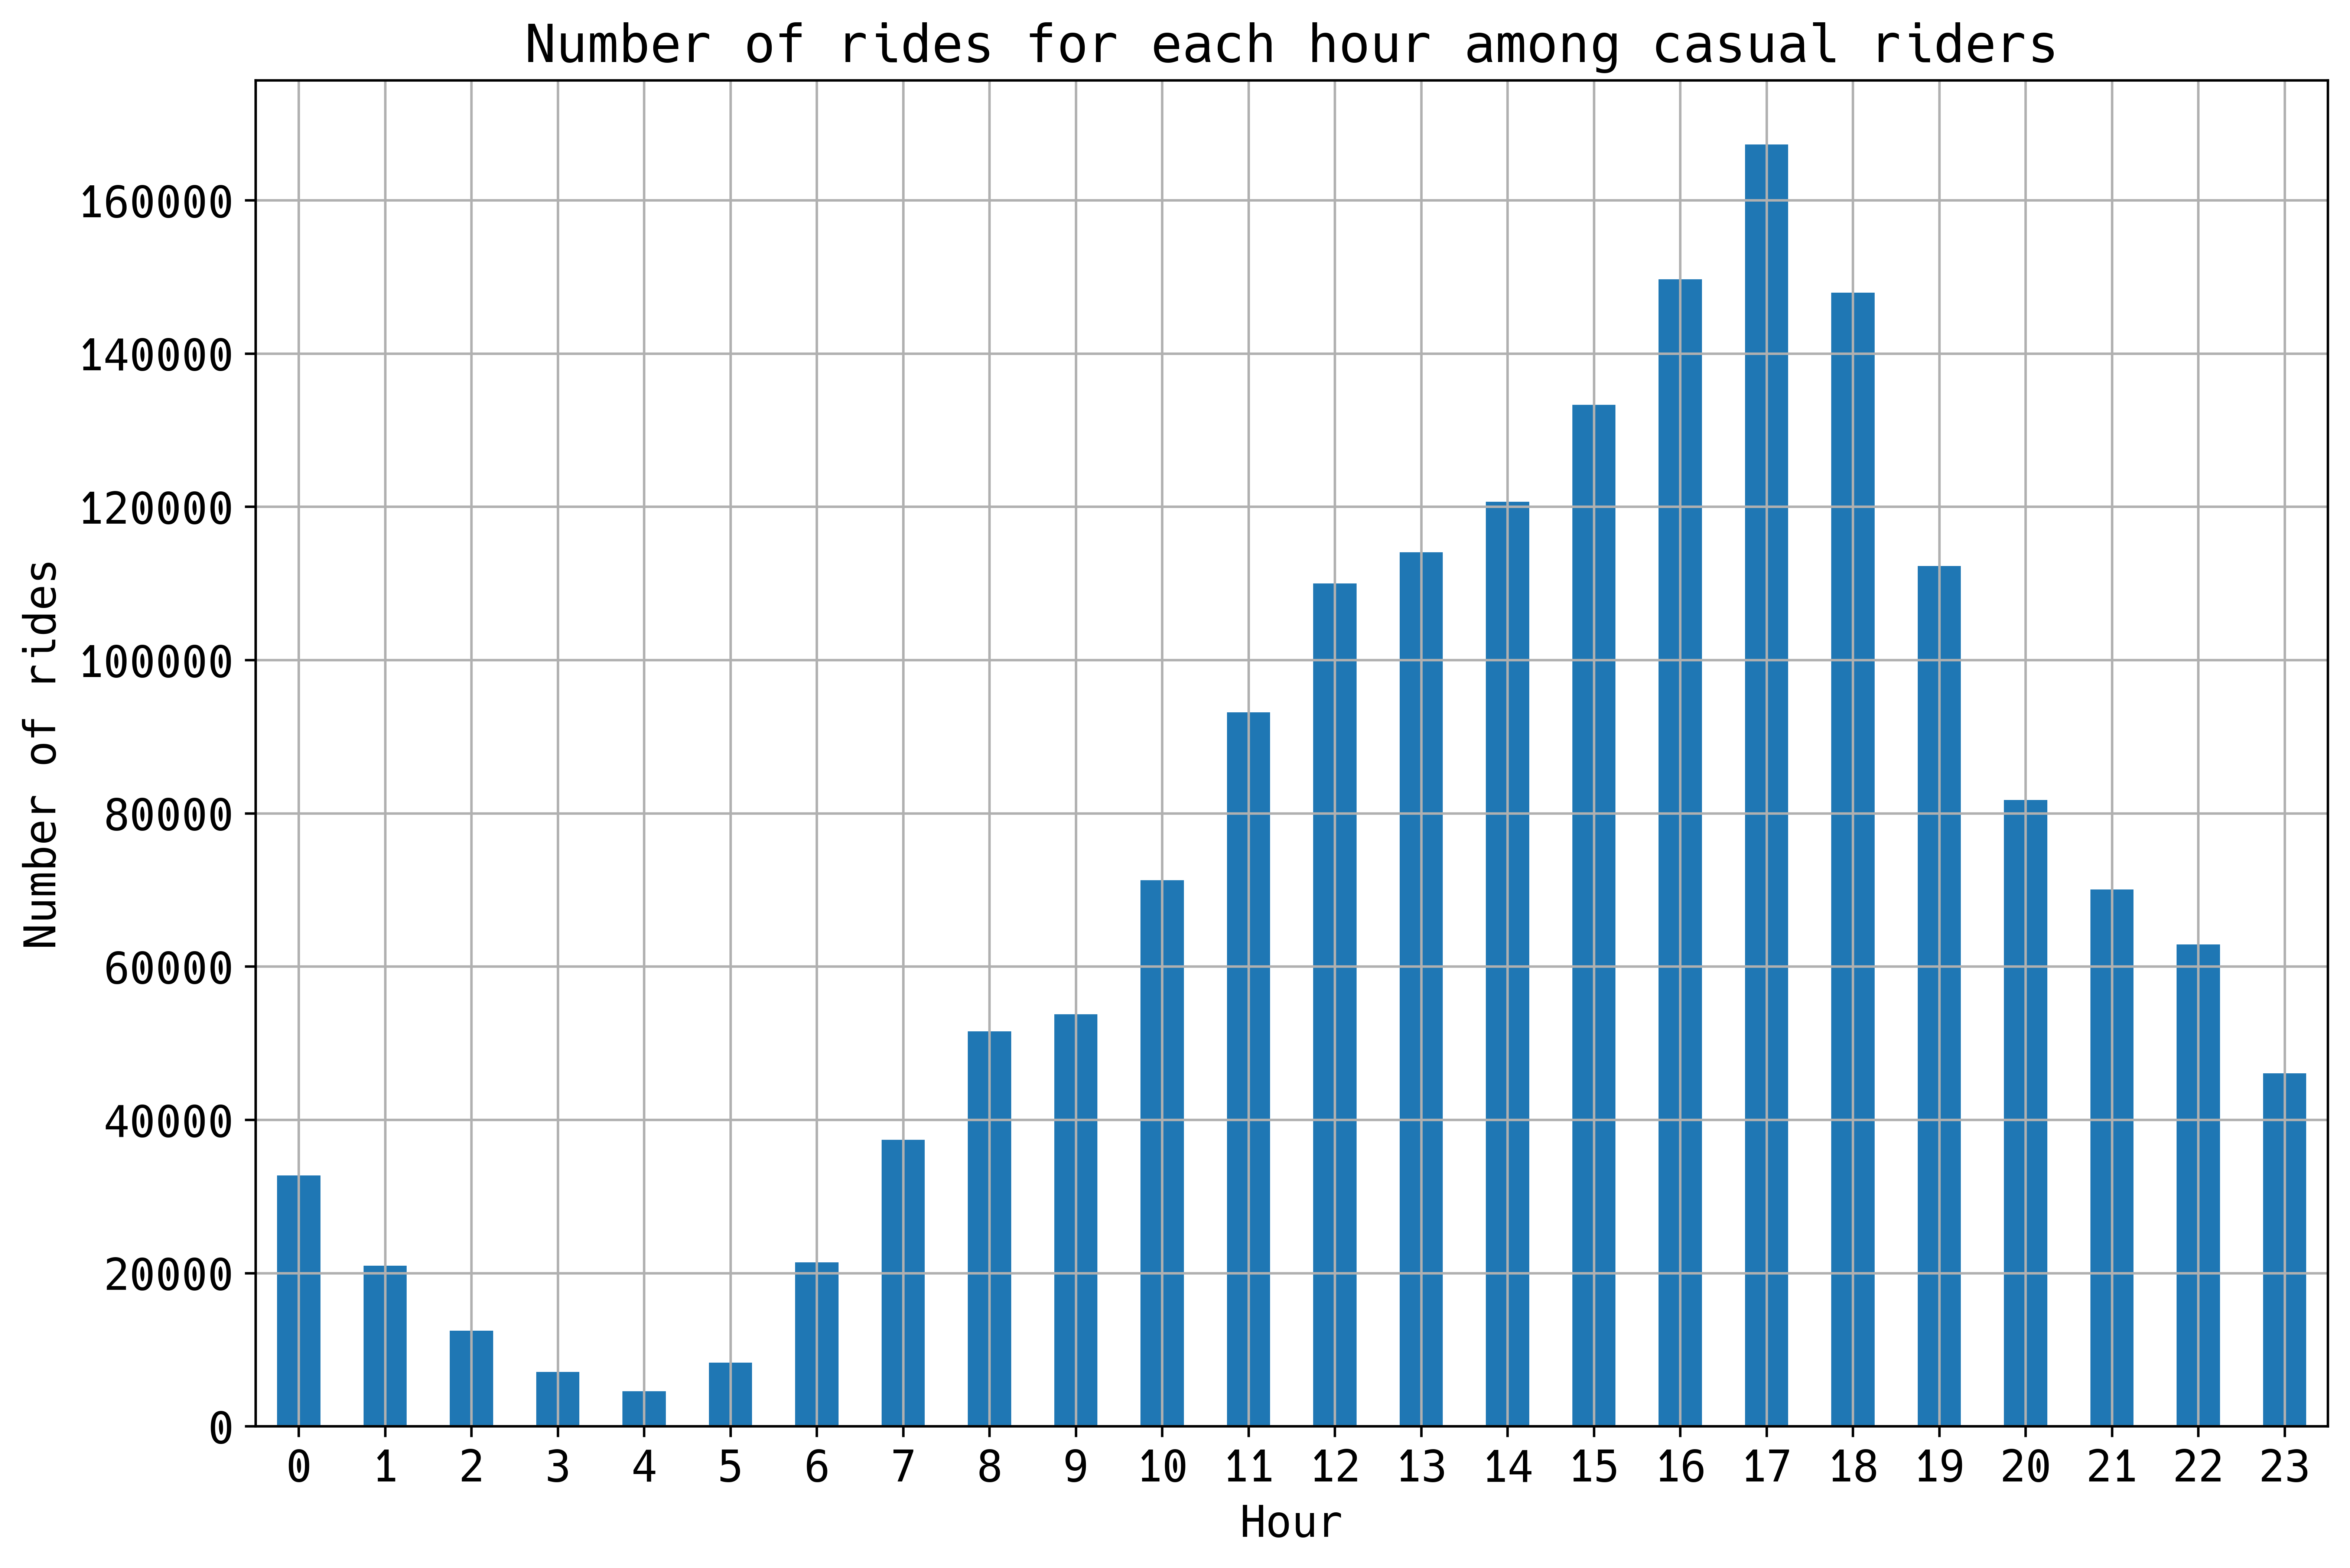

In [84]:
df_casual['start_hour'] = pd.to_datetime(df_casual['started_at']).dt.hour
df_casual.groupby(['start_hour']).size().plot(kind = 'bar')
plt.title('Number of rides for each hour among casual riders')
plt.xlabel('Hour')
plt.ylabel('Number of rides')
plt.xticks(rotation = 0)
plt.show()